# Risk Analytics in Banking and Financial Services Case Study
<hr>

### Introduction

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose we work for a consumer finance company which specialises in lending various types of loans to urban customers. We have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* <b>The client with payment difficulties:</b> he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* <b>All other cases</b>: All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

* <b>Approved:</b> The Company has approved loan Application

* <b>Cancelled:</b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

* <b>Refused:</b> The company had rejected the loan (because the client does not meet their requirements etc).

* <b>Unused offer:</b>  Loan has been cancelled by the client but at different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Data Understanding
This dataset has 3 files as explained below: 

 

<b>1.</b> <i>'application_data.csv'</i>  contains all the information of the client at the time of application.
The data is about whether a <b>client has payment difficulties.</b>

 

<b>2.</b> <i>'previous_application.csv'</i> contains information about the client’s previous loan data. It contains the data on whether the previous application had been <b>Approved, Cancelled, Refused or Unused offer.</b>

 

<b>3.</b> <i>'columns_description.csv'</i> is data dictionary which describes the meaning of the variables.

## Importing required libraries

In [1]:
#Import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Read in the dataset

In [3]:
#Read the data set of "application_data" and "previous_application".
application_data = pd.read_csv("application_data.csv")
previous_application = pd.read_csv("previous_application.csv")

In [4]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)


In [5]:
#Print the head(first five rows) of the data frame.
pd.set_option("display.max_columns", None)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#Check sample random rows from dataset.
application_data.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
50102,158003,1,Cash loans,F,N,N,0,202500.0,1223010.0,51817.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.002042,-19571,-144,-670.0,-3024,NaN,1,1,1,1,1,0,Laborers,1.0,3,3,MONDAY,15,1,1,0,1,1,0,Business Entity Type 1,NaN,0.733774,0.159520,0.0825,0.0767,0.9796,0.7212,0.0344,0.0,0.1379,0.1667,0.0417,0.0341,0.0672,0.0754,0.0,0.0000,0.0840,0.0796,0.9796,0.7321,0.0347,0.0,0.1379,0.1667,0.0417,0.0349,0.0735,0.0785,0.0,0.0000,0.0833,0.0767,0.9796,0.7249,0.0346,0.0,0.1379,0.1667,0.0417,0.0347,0.0684,0.0767,0.0,0.0000,reg oper account,block of flats,0.0781,Panel,No,0.0,0.0,0.0,0.0,-413.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
132977,254229,0,Cash loans,F,Y,Y,0,247621.5,873342.0,24147.0,729000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.007020,-13303,-1255,-1306.0,-1601,3.0,1,1,0,1,0,0,Managers,2.0,2,2,SUNDAY,14,0,0,0,0,0,0,Other,0.723083,0.676189,0.588488,NaN,NaN,0.9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3471,NaN,NaN,NaN,NaN,0.9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3617,NaN,NaN,NaN,NaN,0.9916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3534,NaN,NaN,NaN,NaN,0.3121,NaN,No,2.0,0.0,2.0,0.0,-898.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,3.0
228041,364136,0,Cash loans,F,N,Y,0,243000.0,814041.0,23931.0,679500.0,Unaccompanied,State servant,Higher education,Separated,House / apartment,0.009175,-23414,-8851,-8337.0,-3963,NaN,1,1,0,1,1,0,NaN,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Medicine,NaN,0.482651,0.463275,0.0186,NaN,0.9816,NaN,NaN,0.0,0.1034,0.0417,NaN,NaN,NaN,0.0095,NaN,NaN,0.0189,NaN,0.9816,NaN,NaN,0.0,0.1034,0.0417,NaN,NaN,NaN,0.0099,NaN,NaN,0.0187,NaN,0.9816,NaN,NaN,0.0,0.1034,0.0417,NaN,NaN,NaN,0.0097,NaN,NaN,NaN,block of flats,0.0130,"Stone, b

### Check structure of the dataset

In [7]:
#Check the datatypes of all the columns of the dataframe
application_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Handling and Cleaning
The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage.

In [9]:
#Check the number of null values in the columns
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### Percentage of missing values in application_data

In [10]:
#Check the percentage(%) of null values in the columns
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

#### Removing columns with missing values more than 40%
* As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [11]:
per_null = application_data.isnull().sum() / len(application_data)
missing_values = per_null[per_null > 0.40].index
application_data.drop(missing_values, axis=1, inplace=True)

In [12]:
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [13]:
#Check columns again which have greater than 5% missing values
per_null[per_null > 0.05].index

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

In [14]:
#Dropping EXT_SOURCE_2 and EXT_SOURCE_3 columns because we dont see any importance w.r.t. to target variable
application_data.drop(["EXT_SOURCE_2","EXT_SOURCE_3"],inplace=True,axis=1)

In [15]:
#Dropping FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL columns because we dont see any importance w.r.t. to target variable
application_data.drop(["FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL"],axis=1,inplace=True)

In [16]:
#Flag_Document is not useful to us in our analysis thus dropping them as they dont really add any value to weather to give someone loan or not these are just general documents
flag_doc=[]
for item in application_data.columns:
    if("FLAG_DOCUMENT" in item):
        flag_doc.append(item)

In [17]:
application_data.drop(flag_doc,inplace=True,axis=1)

In [18]:
#Also by analysing the columns and by using the column description we found some more columns like REG_CITY,REG_REGION etc. not adding any values so we will drop them as well
application_data.drop(["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"],axis=1,inplace=True)

In [19]:
#Dropping NAME_TYPE_SUITE column as it does not add any value from goal persepective 
application_data.drop("NAME_TYPE_SUITE",inplace=True,axis=1)

In [20]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
O

#### Missing values Suggestion: 
#### Handling missing values in AMT_REQ_CREDIT_BUREAU_YEAR column

In [21]:
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

41519

In [22]:
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<b>Note: We can Fill NAN with 1 i.e. Median for this field</b>

In [23]:
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1.0,inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_QRT column

In [24]:
application_data["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum()

41519

In [25]:
application_data["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<b>Note: We can Fill NAN with 0 i.e. Median for this field</b>

In [26]:
application_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0.0,inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_MON column

In [27]:
application_data["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

41519

In [28]:
application_data["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<b>Note: We can Fill NAN with 0 i.e. Median for this field</b>

In [29]:
application_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0.0,inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_WEEK column

In [30]:
application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

41519

In [31]:
application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<b>Note: We can Fill NAN with 0 i.e. Median for this field</b>

In [32]:
application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.0,inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_DAY column

In [33]:
application_data["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

41519

In [34]:
application_data["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<b>Note: We can Fill NAN with 0 i.e. Median for this field</b>

In [35]:
application_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.0,inplace=True)

#### Handling missing values in AMT_REQ_CREDIT_BUREAU_HOUR column

In [36]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

41519

In [37]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<b>Note: We can Fill NAN with 0 i.e. Median for this field</b>

In [38]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.0,inplace=True)

#### Handling missing values in OBS and DEF(observations of client's social surroundings) type columns

In [39]:
application_data["OBS_60_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [40]:
application_data["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [41]:
application_data["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [42]:
application_data["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<b>Note: We can Fill NAN with 0 in OBS and DEF(observations of client's social surroundings) type columns, i.e. Median for those fields</b>

In [43]:
application_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)
application_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)
application_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)
application_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.0,inplace=True)

#### Handling missing values in CNT_FAM_MEMBERS column

In [44]:
application_data["CNT_FAM_MEMBERS"].isnull().sum()

2

In [45]:
application_data["CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [46]:
application_data["CNT_FAM_MEMBERS"].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

<b>Note: From the CNT_FAM_MEMBERS column we have found maximum applicants have 2 family members thus we can impute them with the mode value</b>

In [47]:
application_data["CNT_FAM_MEMBERS"].fillna(2.0,inplace=True)

In [48]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
O

<b>Now most of the cleaning is done we will start more on the analysis part and also focus on OCCUPATION column as it has most of the null values and thus We need to analyse further wrt to other columns to find about the type of the missing values.<b>

In [49]:
application_data.columns[(application_data.isnull().any())]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

#### Checking columns for negative values

In [50]:
#Analise DAYS_ type columns
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
5,-16941,-1588,-4970.0,-477,-2536.0
6,-13778,-3130,-1213.0,-619,-1562.0
7,-18850,-449,-4597.0,-2379,-1070.0
8,-20099,365243,-7427.0,-3514,0.0
9,-14469,-2019,-14437.0,-3992,-1673.0


<b>Note: We have found that the DAYS_ type columns have negative values in them which is not possible as someones age cannot be negative so we need to fix them as well.</b>

In [51]:
application_data["DAYS_BIRTH"] = abs(application_data["DAYS_BIRTH"])
application_data["DAYS_EMPLOYED"] = abs(application_data["DAYS_EMPLOYED"])
application_data["DAYS_REGISTRATION"] = abs(application_data["DAYS_REGISTRATION"])
application_data["DAYS_ID_PUBLISH"] = abs(application_data["DAYS_ID_PUBLISH"])
application_data["DAYS_LAST_PHONE_CHANGE"] = abs(application_data["DAYS_LAST_PHONE_CHANGE"])

In [52]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
5,16941,1588,4970.0,477,2536.0
6,13778,3130,1213.0,619,1562.0
7,18850,449,4597.0,2379,1070.0
8,20099,365243,7427.0,3514,0.0
9,14469,2019,14437.0,3992,1673.0


#### Changing the DAYS_BIRTH to year fromat and storing them in a newely genearted column age

In [53]:
application_data["age"] = application_data["DAYS_BIRTH"].apply(lambda x:int(x/365))

In [54]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [55]:
#Dropping DAYS_BIRTH column
application_data.drop("DAYS_BIRTH",inplace=True,axis=1)

#### Handling some  incorrect data types and some unique values in certain columns for more better readability.

In [56]:
#Changing CNT_FAM_MEMBERS column data type float to integer
application_data.CNT_FAM_MEMBERS=application_data.CNT_FAM_MEMBERS.astype("int64")

In [57]:
#Checking data type again for making sure about changes
application_data.CNT_FAM_MEMBERS.dtype

dtype('int64')

In [58]:
#Checking NAME_EDUCATION_TYPE column
application_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [59]:
#Making changes in Secondry education category for better readability
application_data.NAME_EDUCATION_TYPE=application_data.NAME_EDUCATION_TYPE.apply(lambda x:x.replace("Secondary / secondary special","Seconday special"))

In [60]:
#Checking NAME_EDUCATION_TYPE column again for making sure about changes
application_data.NAME_EDUCATION_TYPE.value_counts()

Seconday special     218391
Higher education      74863
Incomplete higher     10277
Lower secondary        3816
Academic degree         164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [61]:
#Checking NAME_FAMILY_STATUS column
application_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [62]:
#Making changes in NAME_FAMILY_STATUS column
application_data.loc[application_data.NAME_FAMILY_STATUS=="Unknown","NAME_FAMILY_STATUS"]=application_data.NAME_FAMILY_STATUS.mode()[0]
application_data.loc[application_data.NAME_FAMILY_STATUS=="Single / not married","NAME_FAMILY_STATUS"]="Single"

In [63]:
#Checking NAME_FAMILY_STATUS column again for making sure about changes
application_data.NAME_FAMILY_STATUS.value_counts()

Married           196434
Single             45444
Civil marriage     29775
Separated          19770
Widow              16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [64]:
#Checking NAME_HOUSING_TYPE column
application_data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [65]:
#Making changes in NAME_HOUSING_TYPE column
application_data.loc[application_data.NAME_HOUSING_TYPE=="House / apartment","NAME_HOUSING_TYPE"]="Apartment"

In [66]:
#Checking NAME_HOUSING_TYPE column again for making sure about changes
application_data.NAME_HOUSING_TYPE.value_counts()

Apartment              272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [67]:
#Checking CODE_GENDER column
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [68]:
#CODE_GENDER has some XNA values thus replacing them with mode value
application_data.loc[application_data.CODE_GENDER=="XNA","CODE_GENDER"]=application_data.CODE_GENDER.mode()[0]

In [69]:
#Checking CODE_GENDER column again for making sure about changes
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Analysing and Fixing null values in OCCUPATION_TYPE column now

In [70]:
#Analysing null values in OCCUPATION_TYPE category wise
application_data[application_data.OCCUPATION_TYPE.isnull()][["ORGANIZATION_TYPE","NAME_INCOME_TYPE"]].value_counts()

ORGANIZATION_TYPE       NAME_INCOME_TYPE    
XNA                     Pensioner               55350
Business Entity Type 3  Working                  8396
                        Commercial associate     5793
Other                   Working                  2934
Self-employed           Working                  2429
                                                ...  
Trade: type 4           Working                     1
Industry: type 11       Student                     1
Self-employed           Businessman                 1
Industry: type 10       State servant               1
                        Commercial associate        1
Length: 180, dtype: int64

In [71]:
temp_set=application_data[application_data.OCCUPATION_TYPE.isnull()][["ORGANIZATION_TYPE","NAME_INCOME_TYPE"]]
temp_set["NAME_INCOME_TYPE"].value_counts(normalize=True)

Pensioner               0.574296
Working                 0.258530
Commercial associate    0.127574
State servant           0.039288
Unemployed              0.000228
Student                 0.000052
Businessman             0.000021
Maternity leave         0.000010
Name: NAME_INCOME_TYPE, dtype: float64

In [72]:
temp_set["ORGANIZATION_TYPE"].value_counts(normalize=True)

XNA                       0.574452
Business Entity Type 3    0.148738
Other                     0.053864
Self-employed             0.036777
Business Entity Type 2    0.023498
Government                0.021610
School                    0.014970
Business Entity Type 1    0.013590
Medicine                  0.011132
Transport: type 4         0.009700
Construction              0.006764
Military                  0.005706
Industry: type 9          0.005447
Industry: type 11         0.005426
Kindergarten              0.005166
Security Ministries       0.005021
Industry: type 3          0.004544
Trade: type 7             0.004492
Housing                   0.004326
Agriculture               0.003839
University                0.003175
Transport: type 2         0.002936
Police                    0.002666
Hotel                     0.002562
Trade: type 3             0.002469
Security                  0.002428
Bank                      0.002417
Industry: type 7          0.002230
Industry: type 4    

In [73]:
application_data.loc[application_data.NAME_INCOME_TYPE=="Pensioner","ORGANIZATION_TYPE"]="Retired"

In [74]:
application_data[(application_data.NAME_INCOME_TYPE=="Pensioner")][["NAME_INCOME_TYPE","ORGANIZATION_TYPE"]]

,NAME_INCOME_TYPE,ORGANIZATION_TYPE
8,Pensioner,Retired
11,Pensioner,Retired
23,Pensioner,Retired
38,Pensioner,Retired
43,Pensioner,Retired
...,...,...
307469,Pensioner,Retired
307483,Pensioner,Retired
307487,Pensioner,Retired
307505,Pensioner,Retired


<b>Note: By analysing the null values of OCCUPATION_TYPE wrt to ORGANIZATION_TYPE and NAME_INCOME_TYPE for understanding, we get that mostly pensioner have ORGANIZATION_TYPE as XNA and OCCUPATION_TYPE is null.
So we are changing OCCUPATION_TYPE as Pensioner of those who are mainly pensioners under NAME_INCOME_TYPE column</b>

In [75]:
#Changing OCCUPATION_TYPE as Pensioner of those who are Pensioners under NAME_INCOME_TYPE column
application_data.loc[application_data.NAME_INCOME_TYPE=="Pensioner","OCCUPATION_TYPE"]="Pensioner"

In [76]:
application_data[(application_data.NAME_INCOME_TYPE=="Pensioner")][["NAME_INCOME_TYPE","OCCUPATION_TYPE"]]

,NAME_INCOME_TYPE,OCCUPATION_TYPE
8,Pensioner,Pensioner
11,Pensioner,Pensioner
23,Pensioner,Pensioner
38,Pensioner,Pensioner
43,Pensioner,Pensioner
...,...,...
307469,Pensioner,Pensioner
307483,Pensioner,Pensioner
307487,Pensioner,Pensioner
307505,Pensioner,Pensioner


In [77]:
#Checking remaining percentage of null values
application_data.OCCUPATION_TYPE.isnull().sum()/int(application_data.shape[0])

0.13343912900676724

In [78]:
application_data[application_data.OCCUPATION_TYPE.isnull()].head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
28,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,675000.0,State servant,Higher education,Single,Apartment,0.046220,1796,4668.0,2661,NaN,1,1,1,WEDNESDAY,11,Military,0.0,0.0,0.0,0.0,849.0,0.0,0.0,0.0,1.0,0.0,1.0,27
30,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Seconday special,Civil marriage,Apartment,0.025164,2668,5266.0,3787,NaN,2,2,2,WEDNESDAY,13,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,41
44,100051,0,Cash loans,M,N,Y,0,202500.0,661702.5,48280.5,598500.0,Working,Seconday special,Civil marriage,Apartment,0.007114,758,4166.0,2380,NaN,2,2,2,WEDNESDAY,12,Business Entity Type 3,1.0,0.0,1.0,0.0,556.0,0.0,0.0,0.0,0.0,0.0,1.0,26
52,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Working,Seconday special,Married,Apartment,0.028663,778,1824.0,1992,NaN,2,2,2,TUESDAY,10,Emergency,4.0,0.0,4.0,0.0,466.0,0.0,0.0,0.0,1.0,0.0,0.0,33
63,100075,0,Cash loans,F,N,N,0,112500.0,95940.0,10462.5,90000.0,Working,Higher education,Single,Apartment,0.004960,3720,5246.0,4541,NaN,1,2,2,MONDAY,14,University,0.0,0.0,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,5.0,33
76,100088,0,Revolving loans,F,N,N,0,112500.0,135000.0,6750.0,135000.0,Commercial associate,Higher education,Married,Apartment,0.022800,4066,4623.0,2975,NaN,2,2,2,THURSDAY,15,School,0.0,0.0,0.0,0.0,1537.0,0.0,0.0,0.0,0.0,0.0,2.0,53
82,100097,0,Cash loans,M,Y,Y,0,157500.0,760225.5,30280.5,679500.0,Working,Seconday special,Married,Apartment,0.035792,2442,3500.0,983,NaN,2,2,2,THURSDAY,10,Business Entity Type 3,6.0,0.0,6.0,0.0,371.0,0.0,0.0,1.0,0.0,0.0,0.0,48
88,100103,0,Cash loans,F,N,Y,0,72000.0,450000.0,16965.0,450000.0,Working,Seconday special,Married,Apartment,0.009175,1694,6057.0,4013,NaN,2,2,2,FRIDAY,12,School,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single,With parents,0.030755,2015,4802.0,1038,NaN,1,2,2,SUNDAY,13,Industry: type 4,0.0,0.0,0.0,0.0,591.0,0.0,0.0,0.0,0.0,0.0,2.0,27
97,100115,0,Cash loans,F,N,N,0,90000.0,315000.0,14683.5,315000.0,Working,Seconday special,Married,Apartment,0.028663,367,3071.0,4211,NaN,2,2,2,SUNDAY,11,Business Entity Type 3,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,2.0,2.0,42


In [79]:
application_data.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221095
Retired                   0.180033
Self-employed             0.124909
Other                     0.054252
Medicine                  0.036395
Business Entity Type 2    0.034314
Government                0.033833
School                    0.028916
Trade: type 7             0.025463
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010949
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008562
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [80]:
application_data[(application_data.ORGANIZATION_TYPE!="Business Entity Type 3") & (application_data.ORGANIZATION_TYPE!="Other")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,Apartment,0.003541,1188,1186.0,291,Core staff,2,1,1,MONDAY,11,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Seconday special,Single,Apartment,0.010032,225,4260.0,2531,Laborers,1,2,2,MONDAY,9,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Seconday special,Single,Apartment,0.028663,3038,4311.0,3458,Core staff,1,2,2,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Pensioner,Seconday special,Married,Apartment,0.018634,365243,7427.0,3514,Pensioner,2,2,2,WEDNESDAY,14,Retired,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Working,Seconday special,Single,Apartment,0.019689,2019,14437.0,3992,Laborers,1,2,2,THURSDAY,8,Electricity,2.0,0.0,2.0,0.0,1673.0,0.0,0.0,0.0,0.0,0.0,1.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Pensioner,Seconday special,Single,Apartment,0.022800,365243,7369.0,2357,Pensioner,1,2,2,MONDAY,15,Retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,66
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Seconday special,Separated,With parents,0.032561,236,8456.0,1982,Sales staff,1,1,1,THURSDAY,15,Services,0.0,0.0,0.0,0.0,273.0,0.0,0.0,0.0,0.0,0.0,1.0,25
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Seconday special,Widow,Apartment,0.025164,365243,4388.0,4090,Pensioner,1,2,2,MONDAY,8,Retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,Apartment,0.005002,7921,6737.0,5150,Managers,1,3,3,THURSDAY,9,School,6.0,0.0,6.0,0.0,1909.0,1.0,0.0,0.0,1.0,0.0,1.0,41


In [81]:
application_data[(application_data.OCCUPATION_TYPE.notnull()) & (application_data.ORGANIZATION_TYPE=="Business Entity Type 3")][["OCCUPATION_TYPE"]].value_counts(normalize=True)

OCCUPATION_TYPE      
Laborers                 0.325847
Sales staff              0.165002
Managers                 0.133038
Drivers                  0.102043
Accountants              0.060555
High skill tech staff    0.058765
Cooking staff            0.030193
Security staff           0.025515
Cleaning staff           0.023353
Core staff               0.022682
Low-skill Laborers       0.014034
Waiters/barmen staff     0.009822
Private service staff    0.008909
Medicine staff           0.005946
HR staff                 0.004138
Secretaries              0.003821
Realty agents            0.003243
IT staff                 0.003094
dtype: float64

<b>Note: After analysing every ORGANIZATION_TYPE value against OCCUPATION_TYPE values we can see that OCCUPATION_TYPE are missing completely at random(MCAR). So its better to impute the OCCUPATION_TYPE values by the phrase <i>"missing"</i></b>

In [82]:
application_data.OCCUPATION_TYPE.fillna("missing",inplace=True)
application_data.OCCUPATION_TYPE.value_counts(normalize=True)

Pensioner                0.180033
Laborers                 0.179457
missing                  0.133439
Sales staff              0.104390
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027758
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015125
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [83]:
application_data.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
ORGANIZATION_TYPE                0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CI

#### Now Cleaning process is mostly completed. Still some columns like AMT_ANNUITY, AMT_GOODS_PRICE and DAYS_LAST_PHONE_CHANGE cloumns have few missing values which we will look into in more detail after some univariate anlysis to find more details about them

## Handling Outliers:
There are two types of outliers:
* <b>Univariate outliers:</b> Are those data points in a variable whose values lie beyond the range of expected values.

* <b>Multivariate outliers:</b> While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value. These are called multivariate outliers.

In [84]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

#### Analysing AMT_ANNUITY column first for null values

In [85]:
application_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

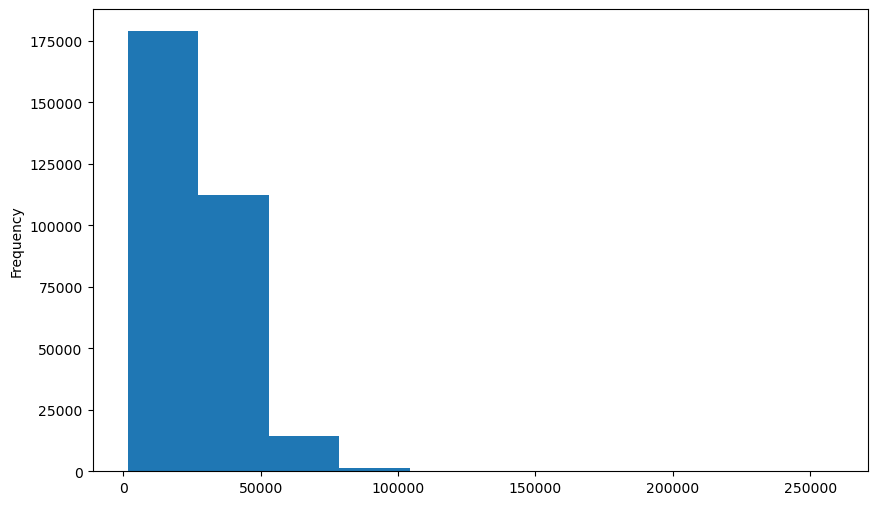

In [86]:
plt.figure(figsize=(10,6))
application_data.AMT_ANNUITY.plot.hist()
plt.show()

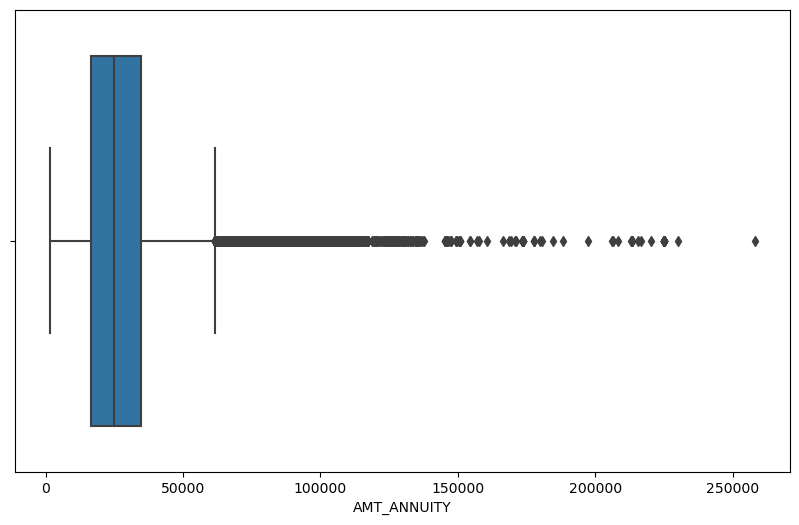

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(application_data.AMT_ANNUITY)
plt.show()

<b>Note: We can infer one thing that AMT_ANNUITY has outliers present in it and one of the outlier is very far from the IQR range.
So we will check it again by capping in order to make sure</b>

In [88]:
application_data.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 0.9999, 1.00])

0.5000     24903.0
0.7000     32004.0
0.9000     45954.0
0.9500     53325.0
0.9900     70006.5
0.9990    110047.5
0.9999    213291.0
1.0000    258025.5
Name: AMT_ANNUITY, dtype: float64

In [89]:
#Imputing those 12  null values in AMT_ANNUITY with median
application_data.AMT_ANNUITY.fillna(application_data.AMT_ANNUITY.median(),inplace=True)
application_data.AMT_ANNUITY.isnull().sum()

0

#### Creating list of numerical variables for outlier detection and finding insights

In [90]:
application_data_num = application_data.select_dtypes(include=["int64","float64"])

In [91]:
application_data_num = application_data_num.columns.tolist()

In [92]:
application_data_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'age']

In [93]:
len(application_data_num)

27

#### Analysing of each numerical variable for outlier
* CNT_CHILDREN Variable analysis

In [94]:
#Describe the CNT_CHILDREN variable
application_data.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

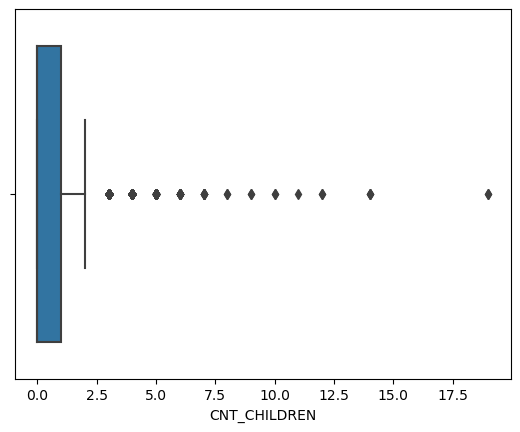

In [95]:
sns.boxplot(application_data.CNT_CHILDREN)
plt.show()

<b>Note:</b> From the CNT_CHILDREN plot we can see there are many outliers but most of the applicants do not have any children and the median value is also zero.<br>
And by checking Statistical Summary we can see some applicants are having children but the IQR lies between 0 to 1.<br>

<b>Conclusion:</b> There are outliers but the number of outliers are very less.

* AMT_INCOME_TOTAL Variable analysis

In [96]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

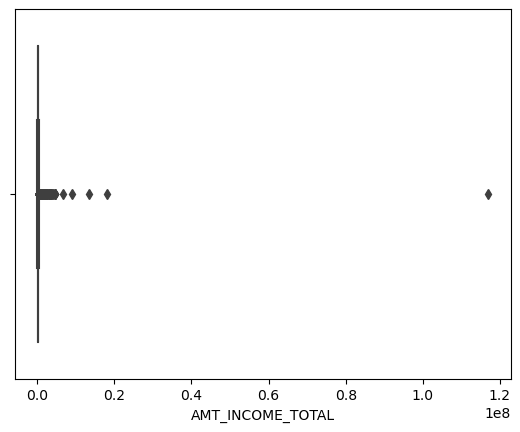

In [97]:
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

In [98]:
application_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 0.9999, 1.00])

0.5000       147150.0
0.7000       180000.0
0.9000       270000.0
0.9500       337500.0
0.9900       472500.0
0.9990       900000.0
0.9999      2250000.0
1.0000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<b>Note:</b> By analysing the AMT_INCOME_TOTAL variable we found that there are some outliers which are close to the 99th percentile value and there is an outlier which has a very high value.<br>

<b>Conclusion:</b> AMT_INCOME_TOTAL variable has outliers in it and also for our analysis we will bin these values based on the percentiles as there is a high variance of the values.

In [99]:
application_data[application_data.AMT_INCOME_TOTAL==117000000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Working,Seconday special,Married,Apartment,0.010643,922,6762.0,3643,Laborers,3,2,2,TUESDAY,14,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34


<b>Point to note:</b>: The person with the highest income is a loan defaulter.

* AMT_CREDIT Variable analysis

In [100]:
application_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

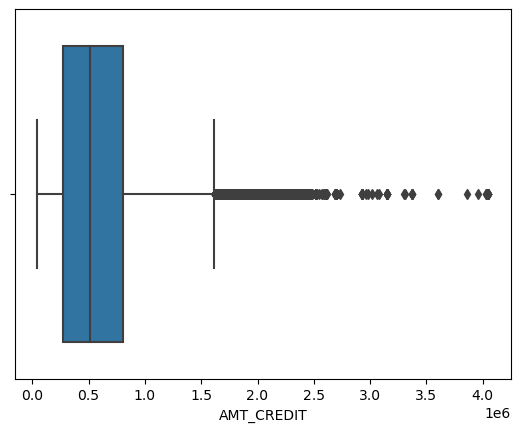

In [101]:
sns.boxplot(application_data.AMT_CREDIT)
plt.show()

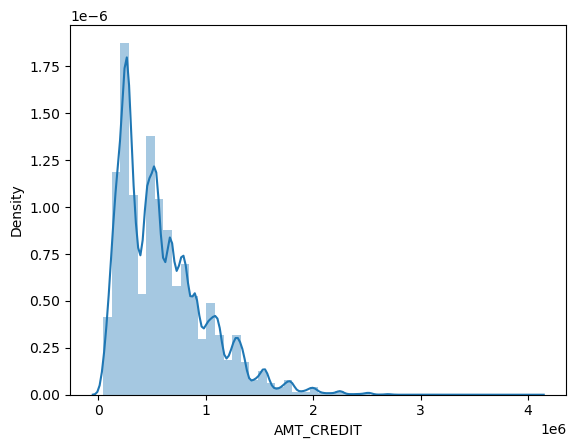

In [102]:
sns.distplot(application_data.AMT_CREDIT)
plt.show()

In [103]:
application_data.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 0.9999, 1.00])

0.5000    5.135310e+05
0.7000    7.551900e+05
0.9000    1.133748e+06
0.9500    1.350000e+06
0.9900    1.854000e+06
0.9990    2.517300e+06
0.9999    3.030531e+06
1.0000    4.050000e+06
Name: AMT_CREDIT, dtype: float64

<b>Note:</b> By analysing the AMT_CREDIT variable we found that most of the applicants are within the IQR range while some values are out of the range but there is a continuous distribution so we can say there is no outliers in it.<br>

* AMT_GOODS_PRICE Variable analysis

In [104]:
application_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

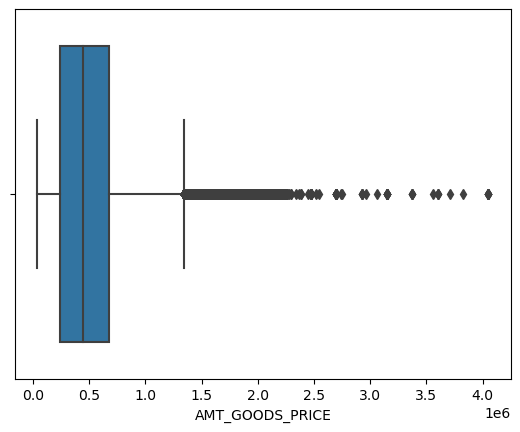

In [105]:
sns.boxplot(application_data.AMT_GOODS_PRICE)
plt.show()

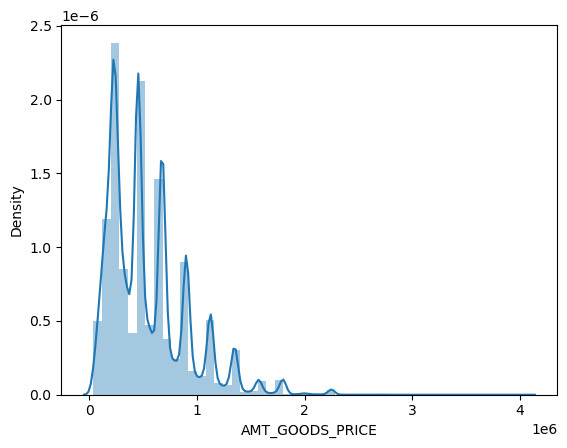

In [106]:
sns.distplot(application_data.AMT_GOODS_PRICE)
plt.show()

In [107]:
application_data.AMT_GOODS_PRICE.quantile([0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 0.9999, 1.00])

0.5000     450000.0
0.7000     675000.0
0.9000    1093500.0
0.9500    1305000.0
0.9900    1800000.0
0.9990    2250000.0
0.9999    2934964.8
1.0000    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

<b>Note:</b> By analysing the AMT_GOODS_PRICE we found that there has very similar trends as AMT_CREDIT_TYPE which means that the amount of laon credit taken and the price of the goods for which the loan was taken is almost similar.<br>

For further analyse we will impute the missing values of AMT_GOODS_PRICE price with median values.

In [108]:
# Imputing the AMT_GOODS_PRICE with median values

application_data.AMT_GOODS_PRICE.fillna(application_data.AMT_GOODS_PRICE.median(),inplace=True)

* DAYS_EMPLOYED Variable analysis

In [109]:
application_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

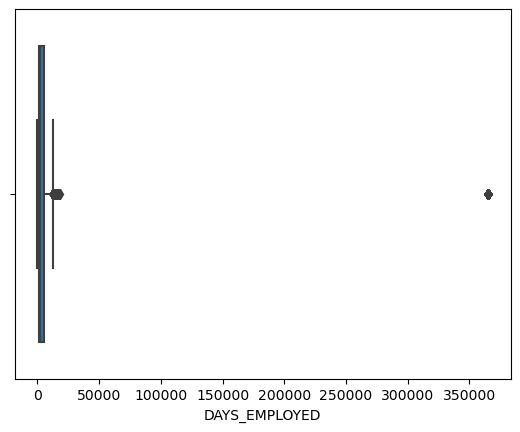

In [110]:
sns.boxplot(application_data.DAYS_EMPLOYED)
plt.show()

In [111]:
application_data.DAYS_EMPLOYED.quantile([0.5, 0.7, 0.8, 0.83, 0.9, 0.99, 0.999, 0.9999, 1.00])

0.5000      2219.0
0.7000      4435.0
0.8000      9188.0
0.8300    365243.0
0.9000    365243.0
0.9900    365243.0
0.9990    365243.0
0.9999    365243.0
1.0000    365243.0
Name: DAYS_EMPLOYED, dtype: float64

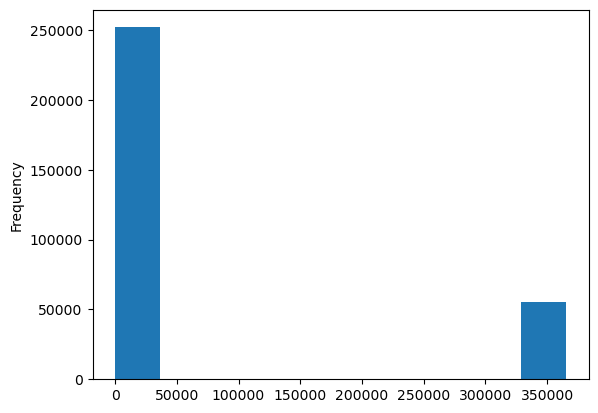

In [112]:
application_data.DAYS_EMPLOYED.plot.hist()
plt.show()

In [113]:
application_data[application_data.DAYS_EMPLOYED==365243.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Seconday special,Married,Apartment,0.018634,365243,7427.0,3514,Pensioner,2,2,2,WEDNESDAY,14,Retired,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Seconday special,Married,Apartment,0.015221,365243,5246.0,2512,Pensioner,2,2,2,FRIDAY,7,Retired,0.0,0.0,0.0,0.0,2396.0,0.0,0.0,0.0,0.0,0.0,2.0,55
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Seconday special,Married,Apartment,0.006296,365243,9012.0,3684,Pensioner,2,3,3,FRIDAY,12,Retired,0.0,0.0,0.0,0.0,795.0,0.0,0.0,0.0,0.0,0.0,3.0,68
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Pensioner,Seconday special,Married,Apartment,0.006207,365243,9817.0,4969,Pensioner,2,2,2,FRIDAY,11,Retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,65
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Pensioner,Higher education,Single,Apartment,0.010966,365243,5745.0,4576,Pensioner,1,2,2,WEDNESDAY,9,Retired,0.0,0.0,0.0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,3.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Pensioner,Seconday special,Single,Apartment,0.031329,365243,11976.0,4171,Pensioner,1,2,2,MONDAY,15,Retired,11.0,2.0,11.0,0.0,1667.0,0.0,0.0,0.0,1.0,0.0,0.0,61
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Pensioner,Seconday special,Separated,Apartment,0.007330,365243,11211.0,4213,Pensioner,1,2,2,MONDAY,12,Retired,1.0,1.0,1.0,1.0,1775.0,0.0,0.0,0.0,0.0,0.0,5.0,68
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Pensioner,Seconday special,Married,Apartment,0.010147,365243,5485.0,4115,Pensioner,2,2,2,WEDNESDAY,10,Retired,0.0,0.0,0.0,0.0,846.0,0.0,0.0,0.0,0.0,1.0,8.0,63
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Pensioner,Seconday special,Single,Apartment,0.022800,365243,7369.0,2357,Pensioner,1,2,2,MONDAY,15,Retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,66


<b>Note:</b> By analysing the DAYS_EMPLOYED we found that there are some outliers as DAYS_EMPLOYED cannot be more than 60 years but some coulumns have values 365243 days i.e., nearly 1000 years.<br>

<b>Conclusion:</b> There are outliers in the column and those outliers are present in a chunk so thus concluding that this column has some error while collecting data.<br>

We are not dropping thsese rows as these applicants may non defaulters.<br>
This column we will not consider much as ananlysis point of view.

* CNT_FAM_MEMBERS Variable analysis

In [114]:
application_data.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [115]:
application_data.CNT_FAM_MEMBERS.value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

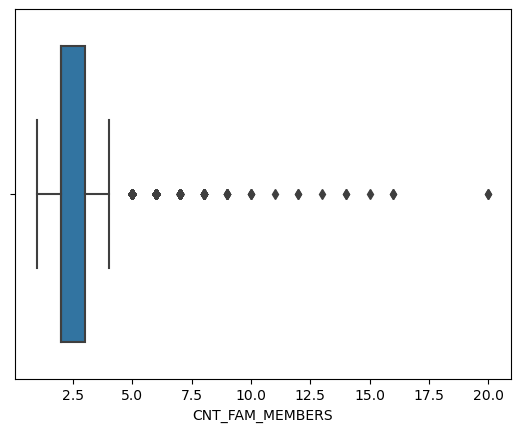

In [116]:
sns.boxplot(application_data.CNT_FAM_MEMBERS)
plt.show()

<b>Note:</b> By analysing CNT_FAM_MEMBERS we found that most families have 2-5 family members present in data.<br>

<b>Conclusion:</b> Some outliers are also present where there are 10 or 20 family members.<br>

* age Variable analysis

In [117]:
application_data.age.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: age, dtype: float64

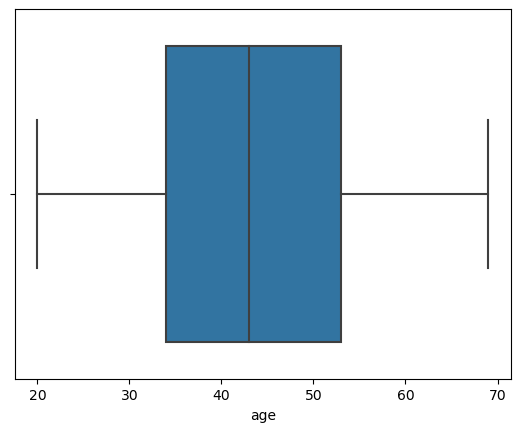

In [118]:
sns.boxplot(application_data.age)
plt.show()

<b>Note:</b> By analysing age we found that there is no outliers present in age variable.<br>

<b>Insights From These plots:</b><br>

* Most numerical columns have outliers present some are erroneous while others are because of the varience of the values.

* DEF and OBS type columns are having majority 0 values and add very less importance towards our analysis.

* REG_CITY and AMT_WEEK and all columns of these naming conventions are also not required as they have very few values in the IQR range.


### Binning some columns into appropriate groups for better analysis

Changing the values of FLAG_OWN_CAR and FLAG_OWN_REALTY dtypes for better analysis

In [119]:
application_data.FLAG_OWN_CAR=application_data.FLAG_OWN_CAR.apply(lambda x:1 if x=="Y" else 0)

In [120]:
application_data.FLAG_OWN_CAR.value_counts(normalize=True)

0    0.659892
1    0.340108
Name: FLAG_OWN_CAR, dtype: float64

In [121]:
application_data.FLAG_OWN_REALTY=application_data.FLAG_OWN_REALTY.apply(lambda x:1 if x=="Y" else 0)

In [122]:
application_data.FLAG_OWN_REALTY.value_counts(normalize=True)

1    0.693673
0    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

Creating age groups as Young, Mature and Senior Citizen

In [123]:
application_data["age_group"]=pd.cut(x=application_data.age,bins=[20,35,55,70],labels=["Young","Mature","Senior Citizen"])

In [124]:
application_data["age_group"].value_counts(normalize=True)

Mature            0.498124
Young             0.299964
Senior Citizen    0.201912
Name: age_group, dtype: float64

Binning AMT_INCOME_TOTAL groups as Very Low, Low, Medium, High, Very High in Income_Range

In [125]:
application_data.AMT_INCOME_TOTAL.quantile([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [126]:
application_data["Income_Range"]=pd.qcut(x=application_data.AMT_INCOME_TOTAL,q=[0.0,0.2,0.4,0.6,0.8,1.0],labels=["Very Low","Low","Medium","High","Very High"])

In [127]:
application_data["Income_Range"].value_counts(normalize=True)

Low          0.278871
High         0.245562
Very Low     0.207053
Very High    0.153224
Medium       0.115290
Name: Income_Range, dtype: float64

## DATA VISUALISATION

### BIVARIATE ANALYSIS WITH RESPECT TO TARGET VARIABLE

### DATA IMBALANCE

In [128]:
application_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

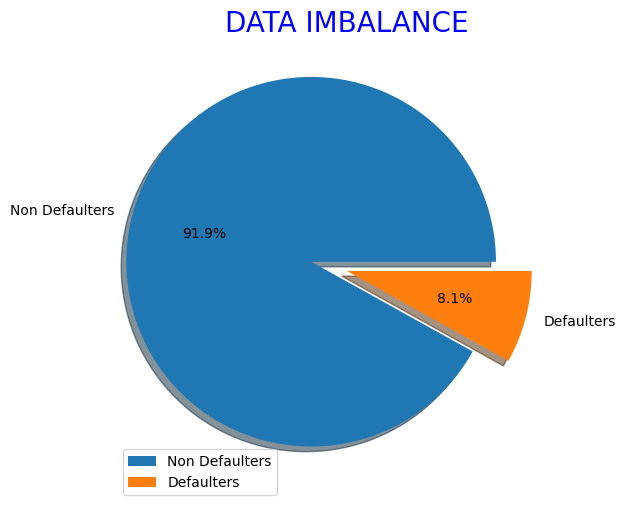

In [129]:
plt.figure(figsize=(10,6))
plt.pie(application_data.TARGET.value_counts(normalize=True),labels=["Non Defaulters","Defaulters"],autopct='%.1f%%',explode=[0.2,0],shadow=True)
plt.legend()
plt.title(label="DATA IMBALANCE",
          fontsize=20,
          color="Blue",loc="center")
plt.show()

<b>Conclusion: From this pie plot we can infer there is a high data imbalance ratio ie the no of defaulters is quite less than the no of non defaulters.</b>

In [130]:
#Calculating data imbalace ratio ####

target_ndef=application_data[application_data.TARGET==0]
target_ndef
target_def=application_data[application_data.TARGET==1]
target_def
imbalance_ratio=int(target_def.shape[0])/int(target_ndef.shape[0])
print(imbalance_ratio)

0.08781828601345662


<b>Conclusion: Data Imbalace ratio is: 0.08</b>

### Numerical variable analysis using Pair Plot
* For non defaulters 

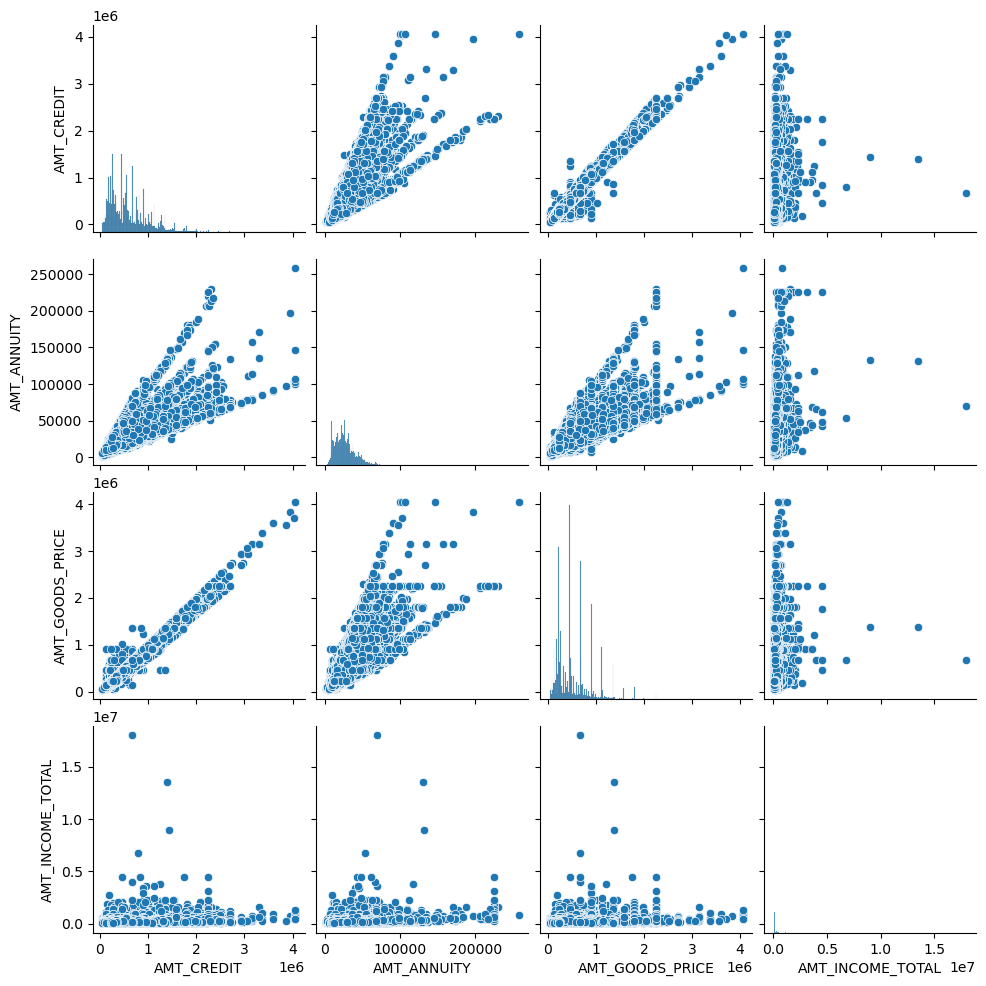

In [131]:
sns.pairplot(data=application_data[application_data.TARGET==0],vars=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL'])
plt.show()

* For defaulters 

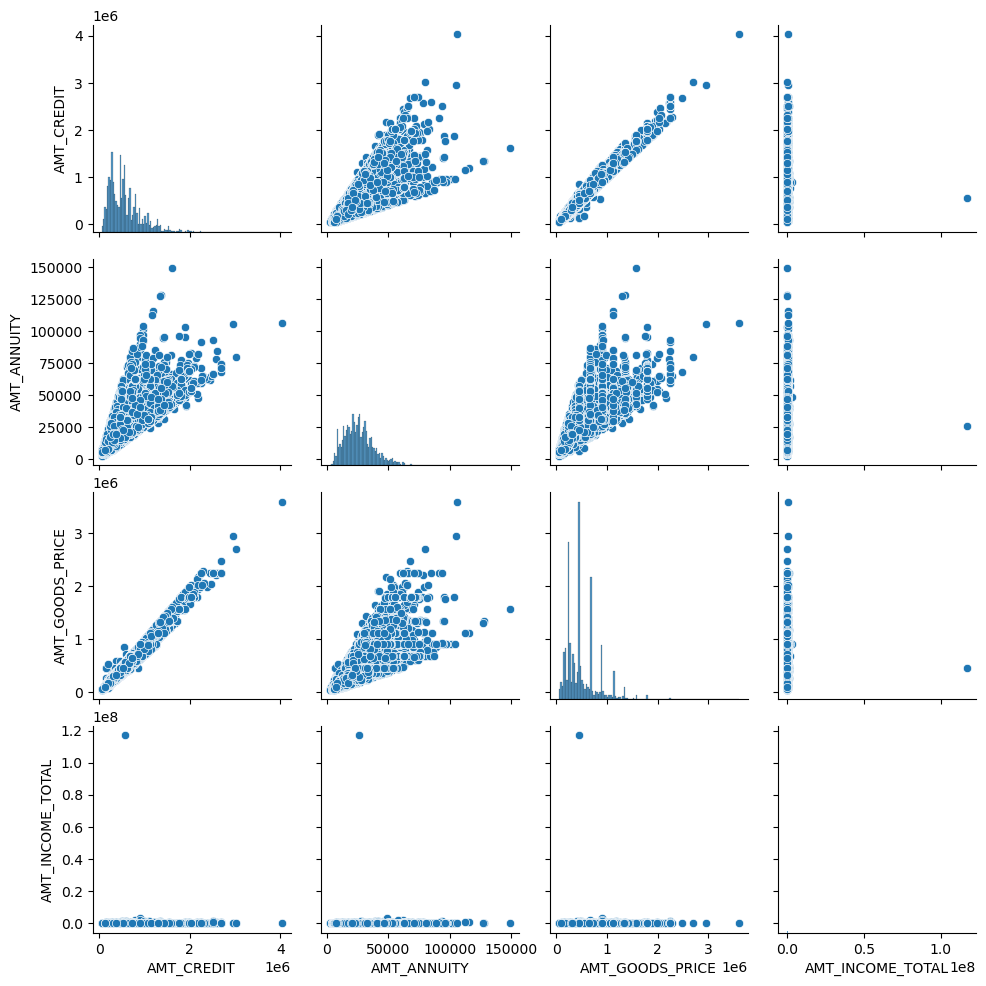

In [132]:
sns.pairplot(data=application_data[application_data.TARGET==1],vars=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL'])
plt.show()

### INSIGHTS:

1) AMT_CREDIT and AMT_GOODS_PRICE are higly correlated for both defaulters and non defaulters which is quite logical as the loan is mostly taken for the goods that the user purchases in most of the cases.

2) AMT_CREDIT and AMT_ANNUITY are also sharing a good correlation among them for both defaulters and non defaulters. This suggests that as the loan amount becomes higher the amount of EMI/interest also becomes larger, while in some cases we see some higher credit amount and lower EMIs that is also a trend which we can see.

3) AMT_ANNUITY and AMT_GOODS_PRICE are also sharing a good correlation among them for both defaulters and non defaulters. This is same as correlation between AMT_CREDIT and AMT_ANNUITY.

### Categorical variable analysis

In [133]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

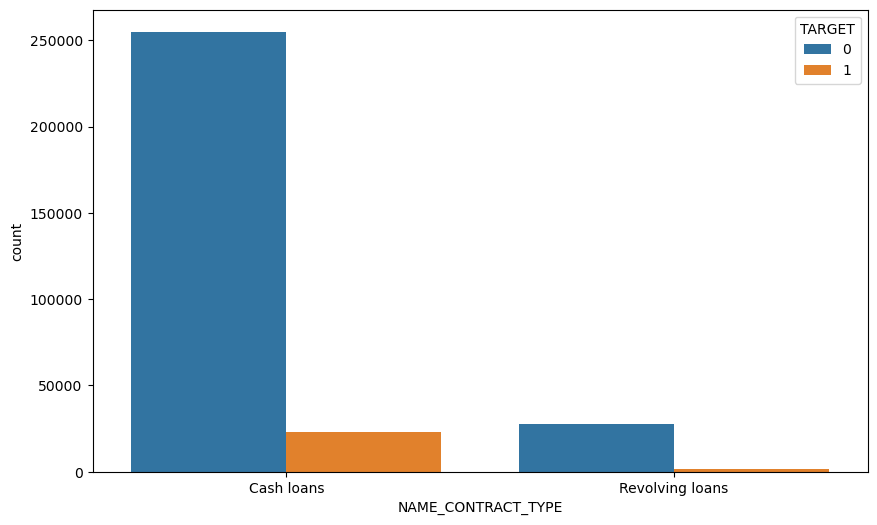

In [134]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="NAME_CONTRACT_TYPE",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Cash loans are a more viable option for non defaulters.</b>

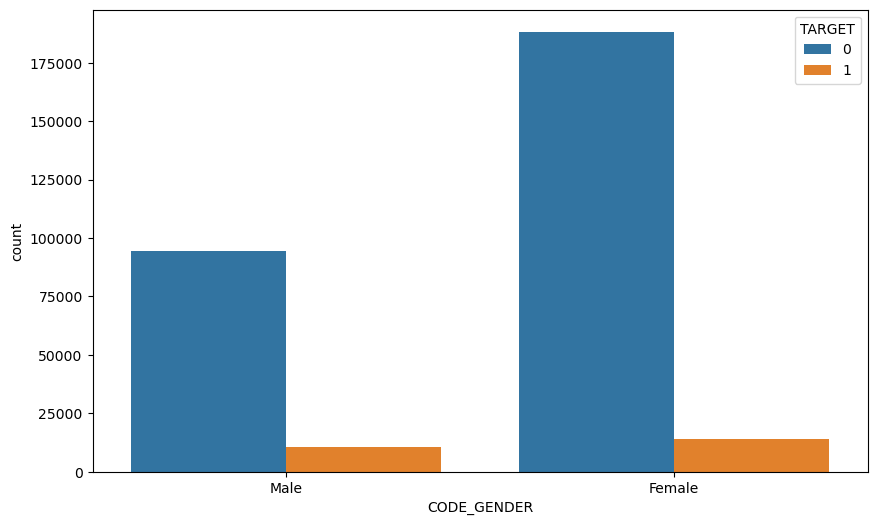

In [135]:
plt.figure(figsize=(10,6))
g=sns.countplot(data=application_data,x="CODE_GENDER",hue="TARGET")
g.set_xticklabels(["Male","Female"])
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: From gender perspective Female applicants are better compared to male as there are less defaulters in Female than in Male.</b>

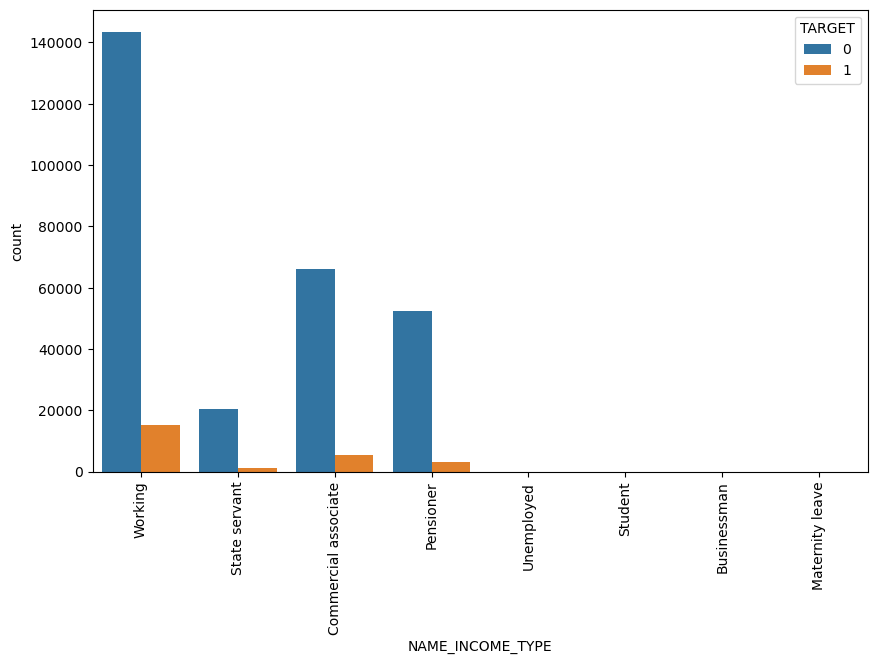

In [136]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="NAME_INCOME_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.show()

<b>Conclusion: From INCOME Type we can se working class people are taking more loans and there are large no of defaulters presentin them.</b>

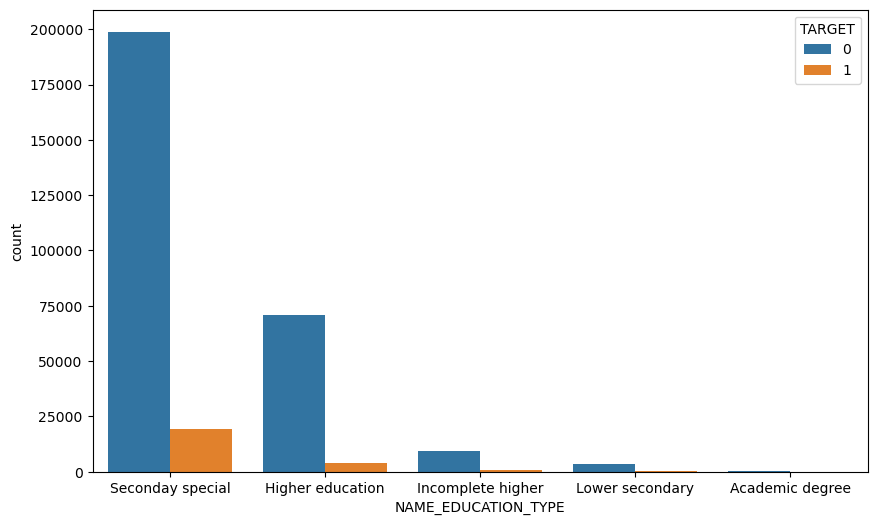

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="NAME_EDUCATION_TYPE",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: From education perspective those having secondary special education are taking large no of loans and majority of defaulters and non defaulters are present in this category.</b>

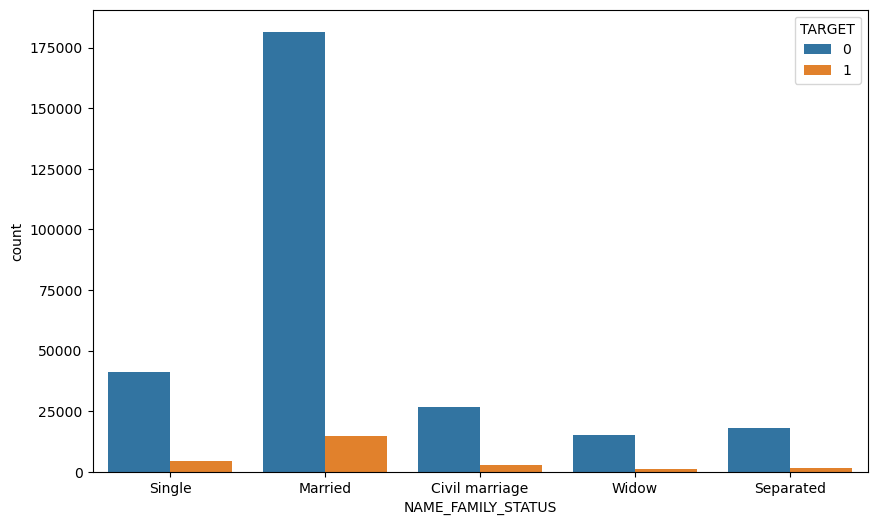

In [138]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="NAME_FAMILY_STATUS",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Married people are taking most loans which is quite logical as they form majority of the population and mostly apply for house and car loans.Both deafulters and non defaulters are presnt in high amount.</b>

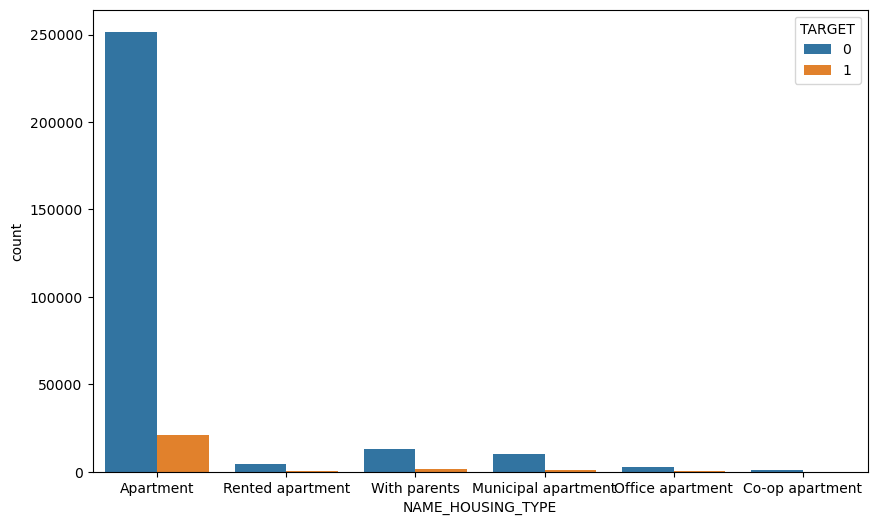

In [139]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="NAME_HOUSING_TYPE",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Those who living in apartments are taking more loan compared to all others and also have the highest no of defaulters.</b>

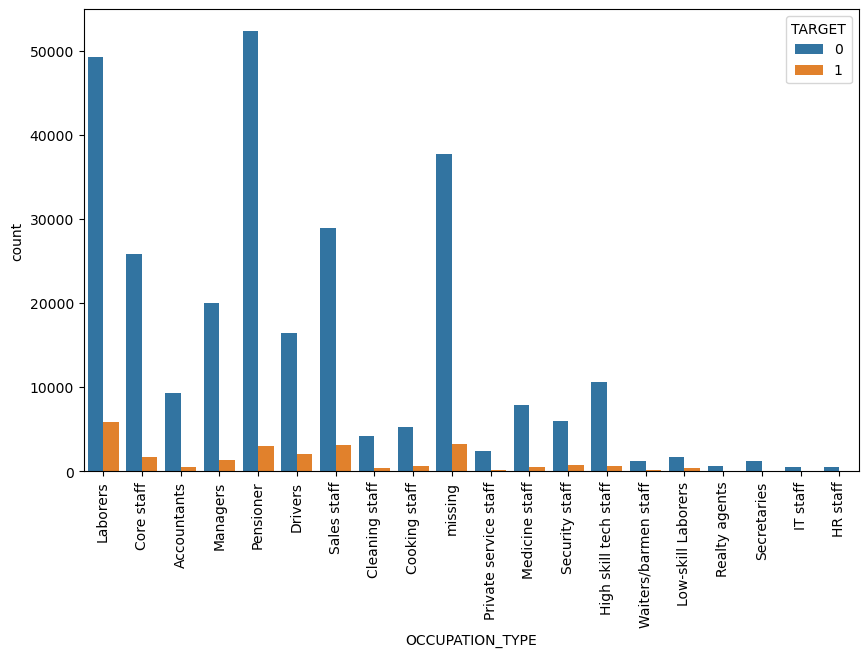

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="OCCUPATION_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.show()

<b>Conclusion: Those people who are Laborers and Pensioner by OCCUPATION_TYPE are taking more loan compared to all others and also under the Laborers category there are highest no of defaulters.</b>

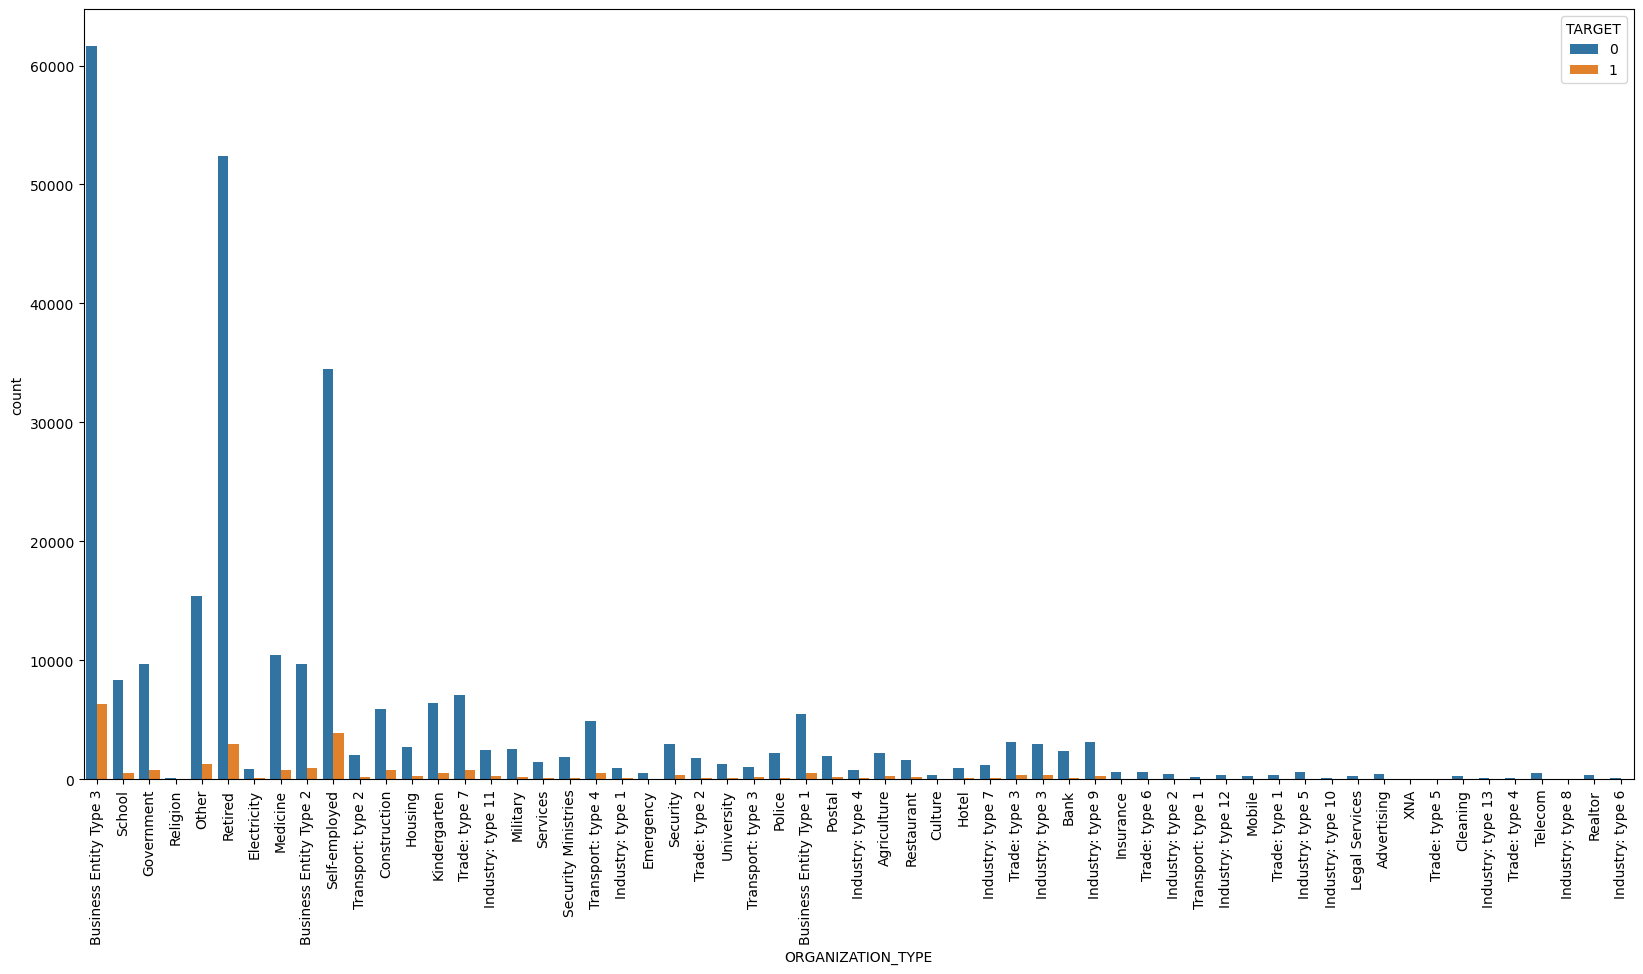

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(data=application_data,x="ORGANIZATION_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.show()

<b>Conclusion: Most of the people work in Buisness Entity type 3, Retired and Self-employed taking more loan compared to all others and also have the most defaulters and non defaulters. Those who working in Industry are not taking many loans for all of the industry types.</b>

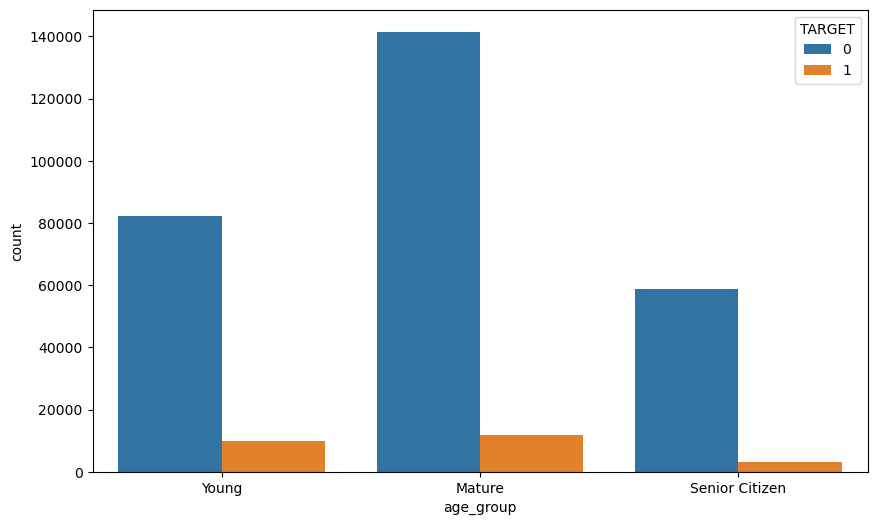

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="age_group",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Mature(Middle aged) people are taking more loans and have the highest no of defaulters and non defaulters while Snenior citizen and Young people are alos taking loans where Senior citizen are better as there are less no of defaulters among them in compare to Young People.</b>

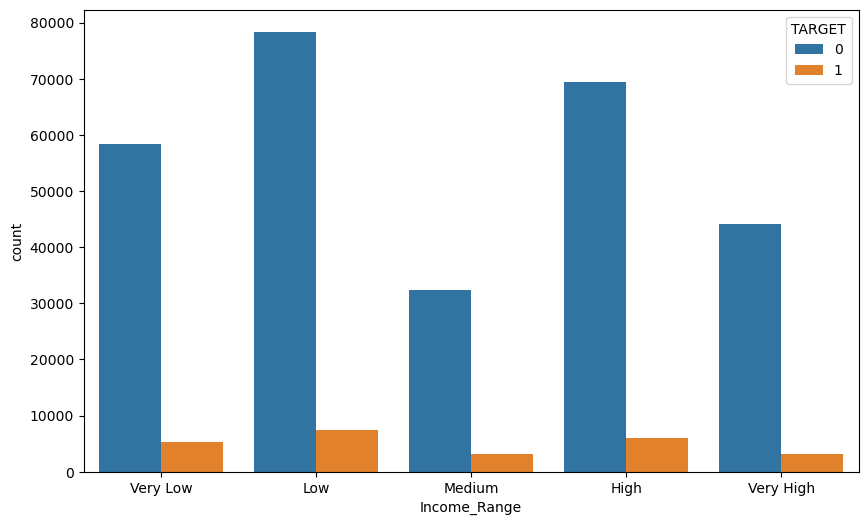

In [143]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="Income_Range",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Those people who having Low income are taking more loans and the non defaulter amount is more , while all other income types are having equal amount of ratio of defaulter and non defaulters. Another thing we can observe that people having high income range are not able to pay EMIS on timely basis and becoming defaulters.</b>

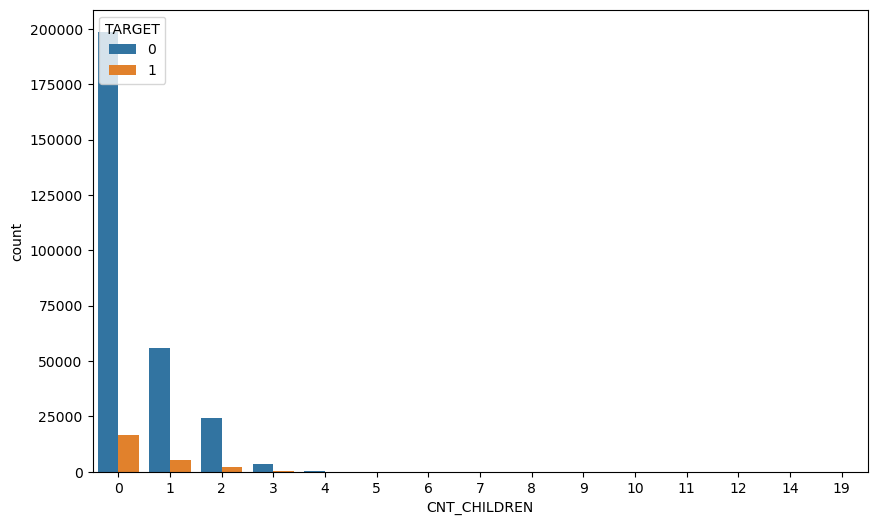

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="CNT_CHILDREN",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Most people who do not have any childrens are taking more loans. People who having 1 or 2 children in their family also taking loans.</b>

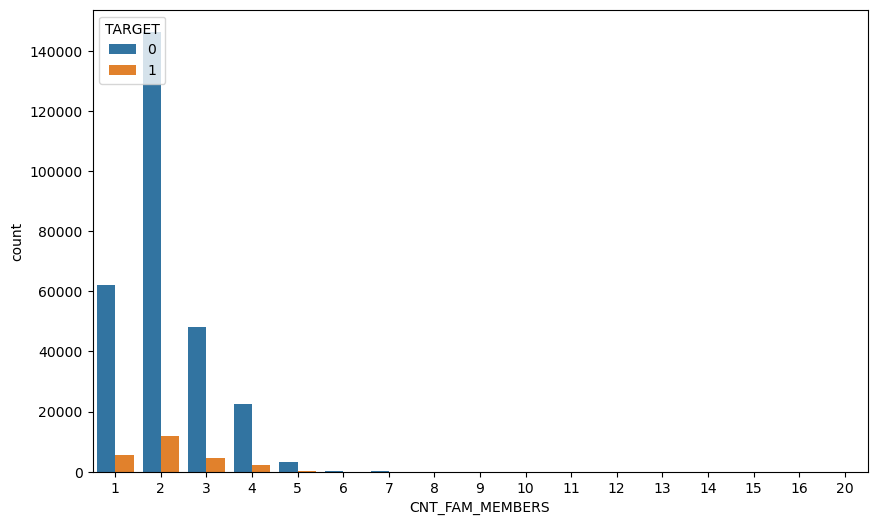

In [145]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="CNT_FAM_MEMBERS",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Most of the People have 2 family members are taking more loans having both defaulters and non defaulters. We can say those are the people who do not have childrens or another word CNT_CHILDREN and CNT_FAM_MEMBERS variables are highly correlated with each other.</b>

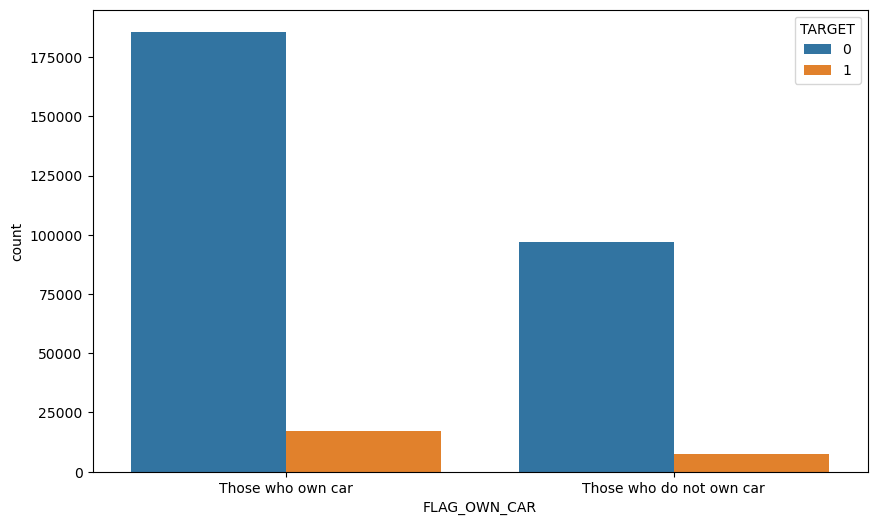

In [146]:
plt.figure(figsize=(10,6))
oc=sns.countplot(data=application_data,x="FLAG_OWN_CAR",hue="TARGET")
oc.set_xticklabels(["Those who own car","Those who do not own car"])
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Most of the people who owning cars taking more loans and also have most defaulters in compare to those who do not own car.</b>

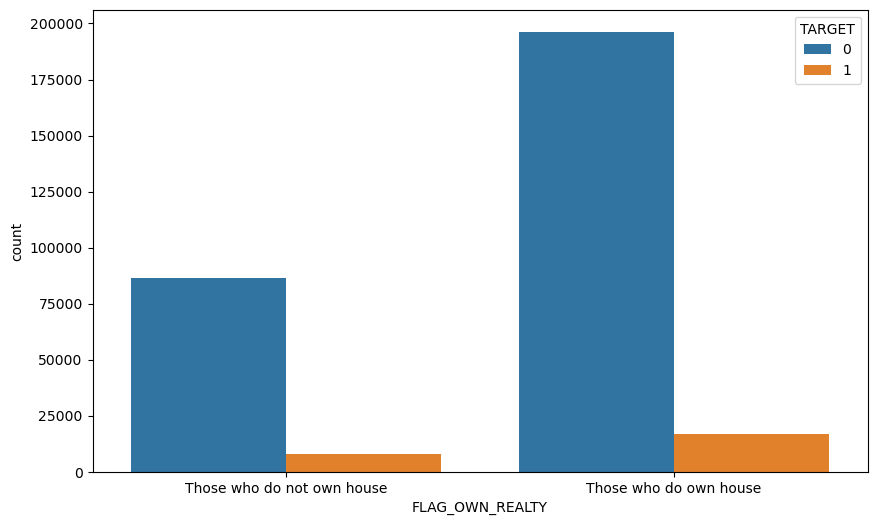

In [147]:
plt.figure(figsize=(10,6))
oh=sns.countplot(data=application_data,x="FLAG_OWN_REALTY",hue="TARGET")
oh.set_xticklabels(["Those who do not own house","Those who do own house"])
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: Similar trend is shown in FLAG_OWN_REALTY variable. Most of the people who own House taking more loans and also have most defaulters in compare to those who do not own house.</b>

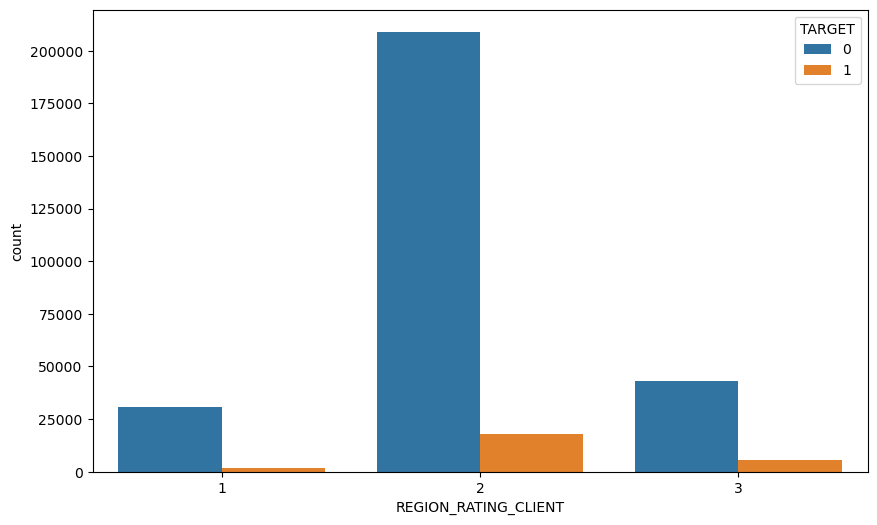

In [148]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="REGION_RATING_CLIENT",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

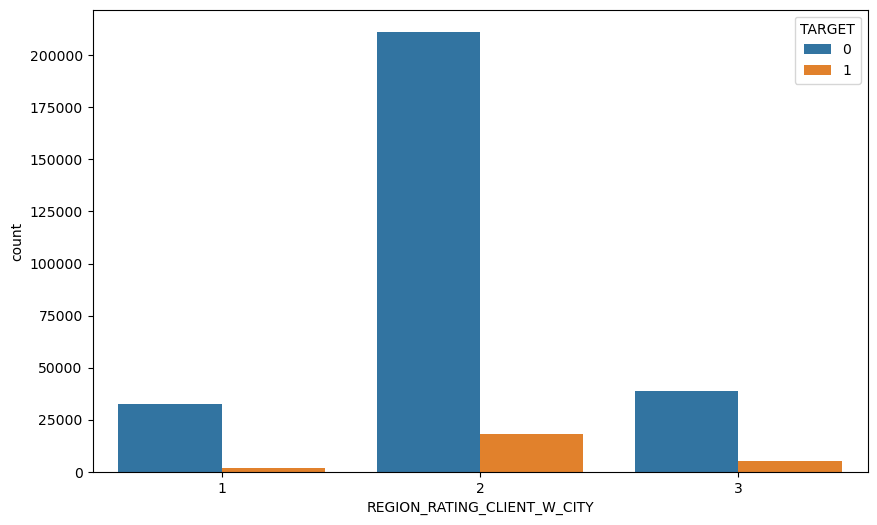

In [149]:
plt.figure(figsize=(10,6))
sns.countplot(data=application_data,x="REGION_RATING_CLIENT_W_CITY",hue="TARGET")
plt.xticks(rotation=0)
plt.show()

<b>Conclusion: People who are in second(2) category under REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY taking more loans and also have most defaulters.</b>

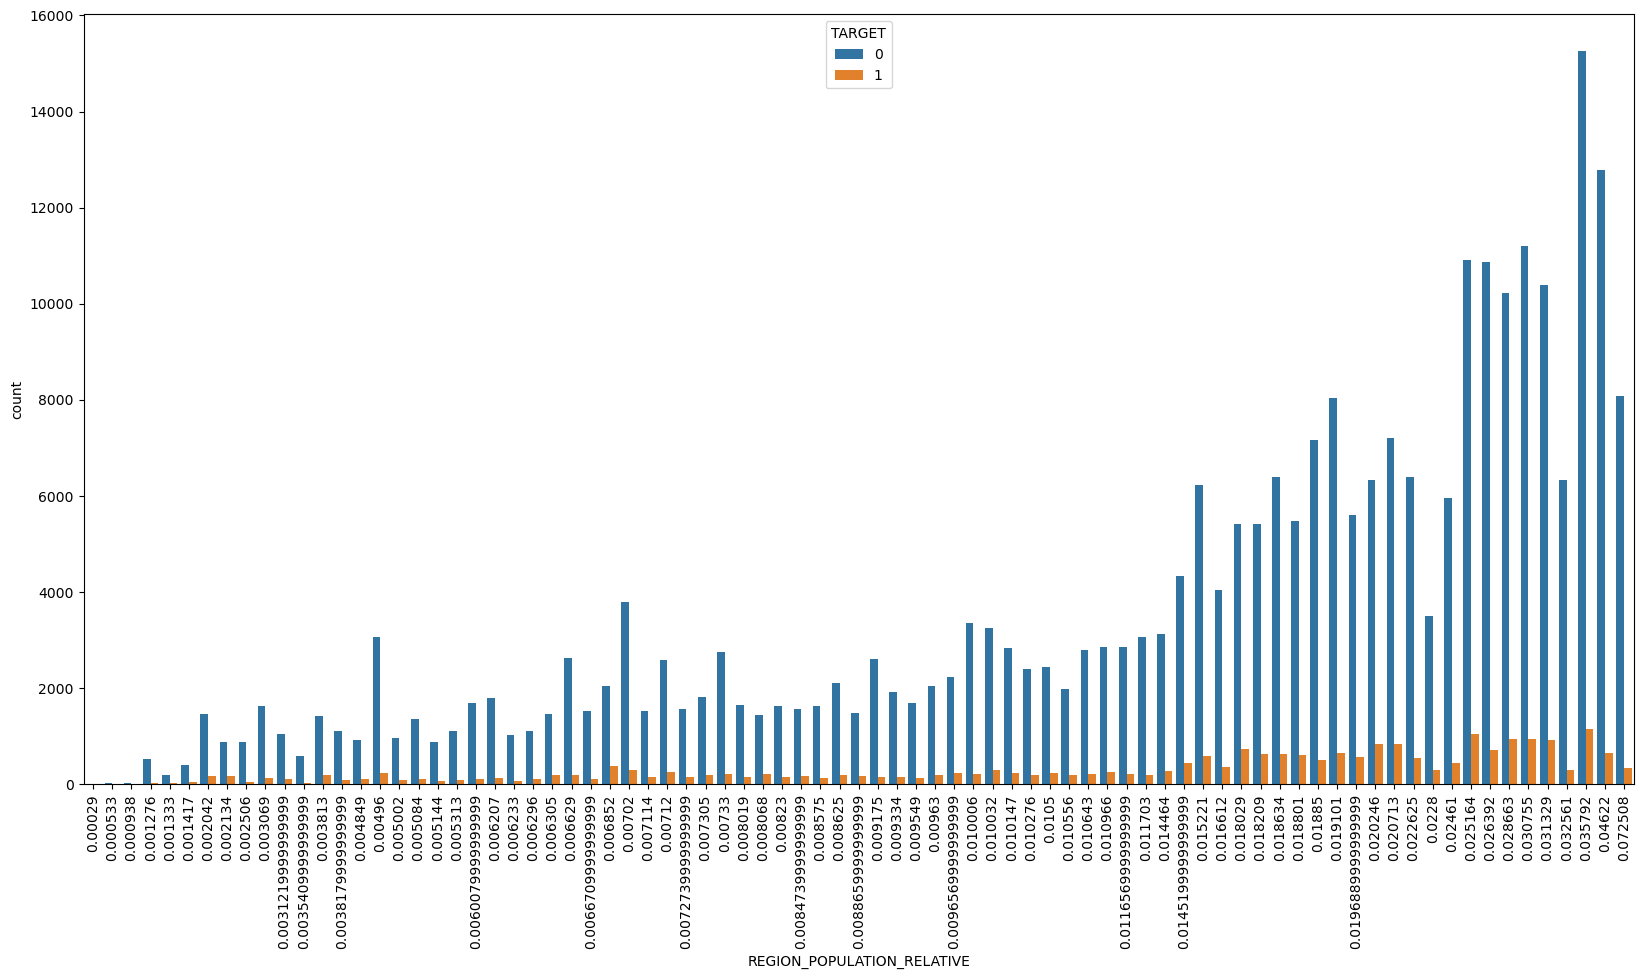

In [150]:
plt.figure(figsize=(20,10))
sns.countplot(data=application_data,x="REGION_POPULATION_RELATIVE",hue="TARGET")
plt.xticks(rotation=90)
plt.show()

<b>Conclusion: People who lives in more populated region taking more loans and also have most defaulters.</b>

## Insights Summary:

<b>1. Cash loans are a more viable option for non defaulters.</b>
    
<b>2. From gender perspective Female applicants are better compared to male as there are less defaulters in Female than in Male.</b>
    
<b>3. From INCOME Type we can se working class people are taking more loans and there are large no of defaulters present.</b>
    
<b>4. From education perspective those having secondary special education are taking large no of loans and majority of defaulters and non defaulters are present in this category.</b>
    
<b>5. Married people are taking most loans which is quite logical as they form majority of the population and mostly apply for house and car loans.Both deafulters and non defaulters are presnt in high amount.</b>
    
<b>6. Those living in apartments are taking more loan compared to all others and also have the highest no of defaulters.</b>
    
<b>7. Those people who are Laborers and Pensioner by OCCUPATION_TYPE are taking more loan compared to all others and also under the Laborers category there are highest no of defaulters.</b>
    
<b>8. Most of the people work in Buisness Entity type 3, Retired and Self-employed taking more loan compared to all others and also have the most defaulters and non defaulters. Those who working in Industry are not taking many loans for all of the industry types.</b>
    
<b>9. Mature(Middle aged) people are taking more loans and have the highest no of defaulters and non defaulters while Snenior citizen and Young people are alos taking loans where Senior citizen are better as there are less no of defaulters among them in compare to Young People.</b>
    
<b>10. Those people who having Low income are taking more loans and the non defaulter amount is more , while all other income types are having equal amount of ratio of defaulter and non defaulters. Another thing we can observe that people having high income range are not able to pay EMIS on timely basis and becoming defaulters.</b>
    
<b>11. Most people who do not have any childrens are taking more loans. People who having 1 or 2 children in their family also taking loans.</b>
    
<b>12. Most of the People have 2 family members are taking more loans having both defaulters and non defaulters. We can say those are the people who do not have childrens or another word CNT_CHILDREN and CNT_FAM_MEMBERS variables are highly correlated with each other.</b>

<b>13. Most of the people who owning cars taking more loans and also have most defaulters in compare to those who do not own car.</b>
    
<b>14. Similar trend is shown in FLAG_OWN_REALTY variable. Most of the people who own House taking more loans and also have most defaulters in compare to those who do not own house.</b>
    
<b>15. People who are in second(2) category under REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY taking more loans and also have most defaulters.</b>
    
<b>16. People who lives in more populated region taking more loans and also have most defaulters.</b>

### Numerical Univariate Analysis

In [151]:
lst_num=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]

#### Distribution plot for the important numerical variables

* FOR NON DEFAULTERS

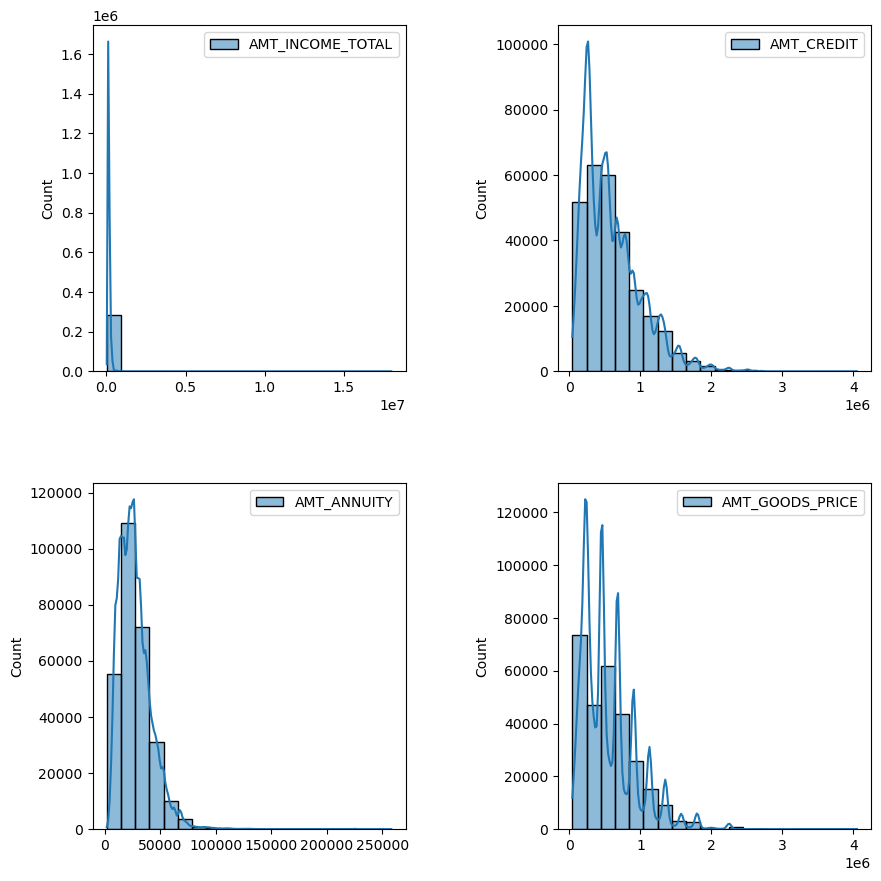

In [152]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))

for item,ax in zip(lst_num,axes.flatten()):
    
    sns.histplot(data=application_data[(application_data.TARGET==0)][[item]],kde=True,bins=20,ax=ax)
    
fig.tight_layout(pad=5.0)

plt.show()

* FOR DEFAULTERS

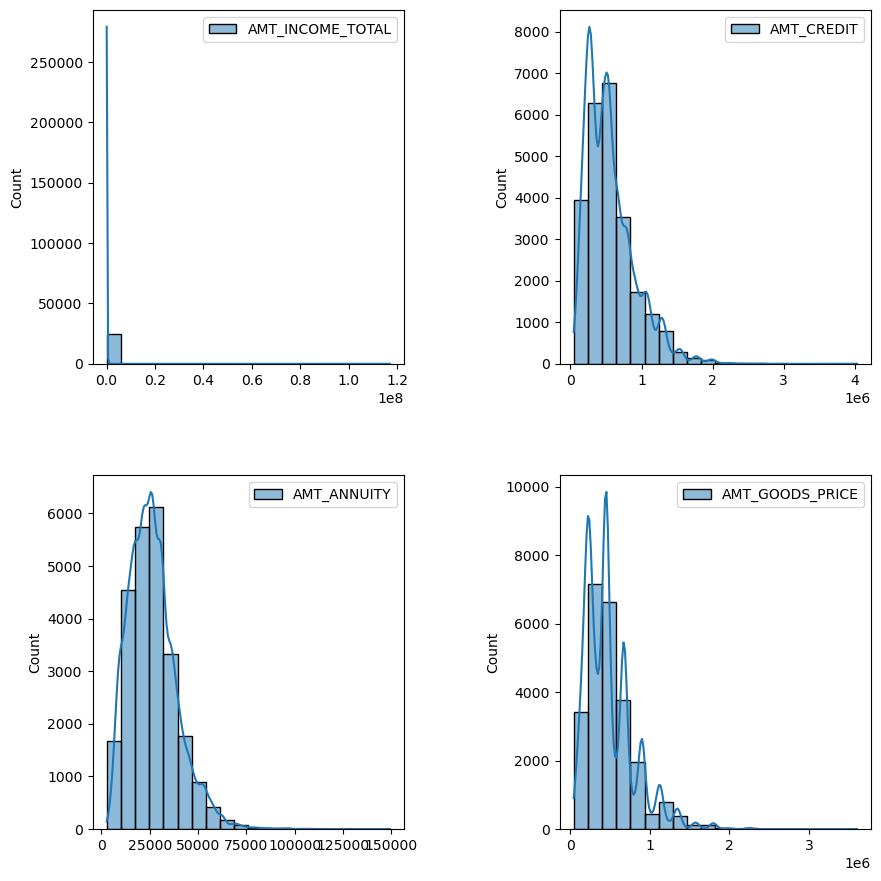

In [153]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))

for item,ax in zip(lst_num,axes.flatten()):
    
    sns.histplot(data=application_data[(application_data.TARGET==1)][[item]],kde=True,bins=20,ax=ax)
    
fig.tight_layout(pad=5.0)

plt.show()

## Insights
<b>1. Those who are non defaulters have an varying income range as compared to defaulters.</b>


<b>2. Dist. plot clearly shows that the shape in Income total, Annuity, Credit and Good Price are similar for defaulters and non defaulters.</b>

### Bivariate Analysis of Numerical vs Categorical and Numerical vs Numerical

In [154]:
def p75(x):
    return np.quantile(x, 0.75)
def p25(x):
    return np.quantile(x,0.25)

<Figure size 600x600 with 0 Axes>

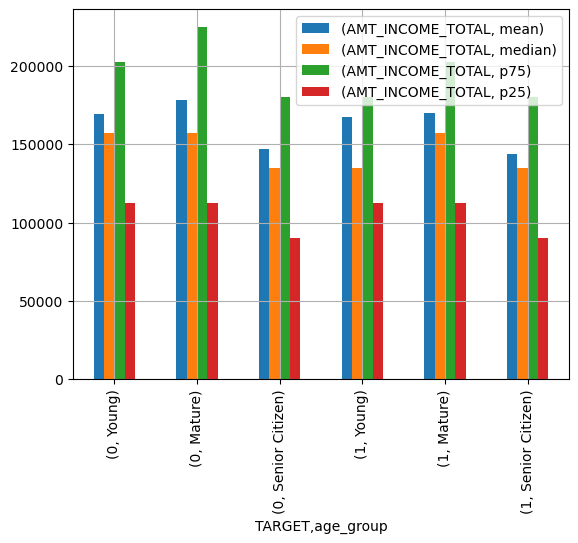

In [155]:
plt.figure(figsize=(6,6))
application_data.groupby(by=["TARGET","age_group"])[["AMT_INCOME_TOTAL"]].aggregate(["mean","median",p75,p25]).plot.bar()
plt.legend(loc="best")
plt.grid()
plt.show()

<Figure size 600x600 with 0 Axes>

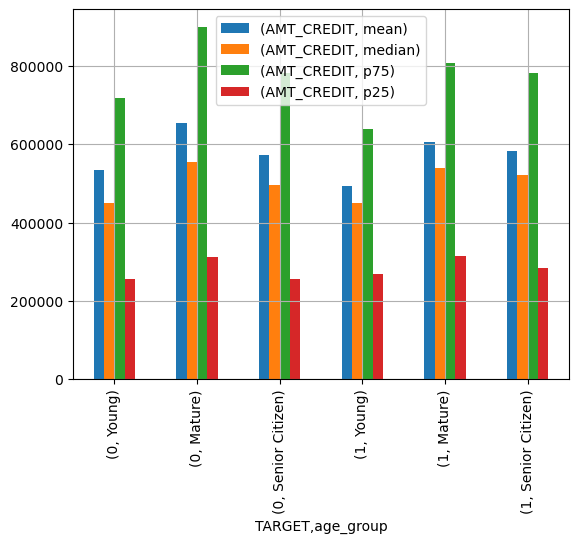

In [156]:
plt.figure(figsize=(6,6))
application_data.groupby(by=["TARGET","age_group"])[["AMT_CREDIT"]].aggregate(["mean","median",p75,p25]).plot.bar()
plt.legend(loc="best")
plt.grid()
plt.show()

<b>Note: Middle aged people has higher incomes. we have done this for amt_annual as there are some outliers present in it thus for all percentiles we are plotting to get a good view.</b>

In [157]:
lst_cat = ["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","age_group","Income_Range","CNT_CHILDREN","CNT_FAM_MEMBERS"]

### Bivariate Analysis of AMT_CREDIT and AMT_INCOME_TOTAL

* FOR NON DEFAULTERS

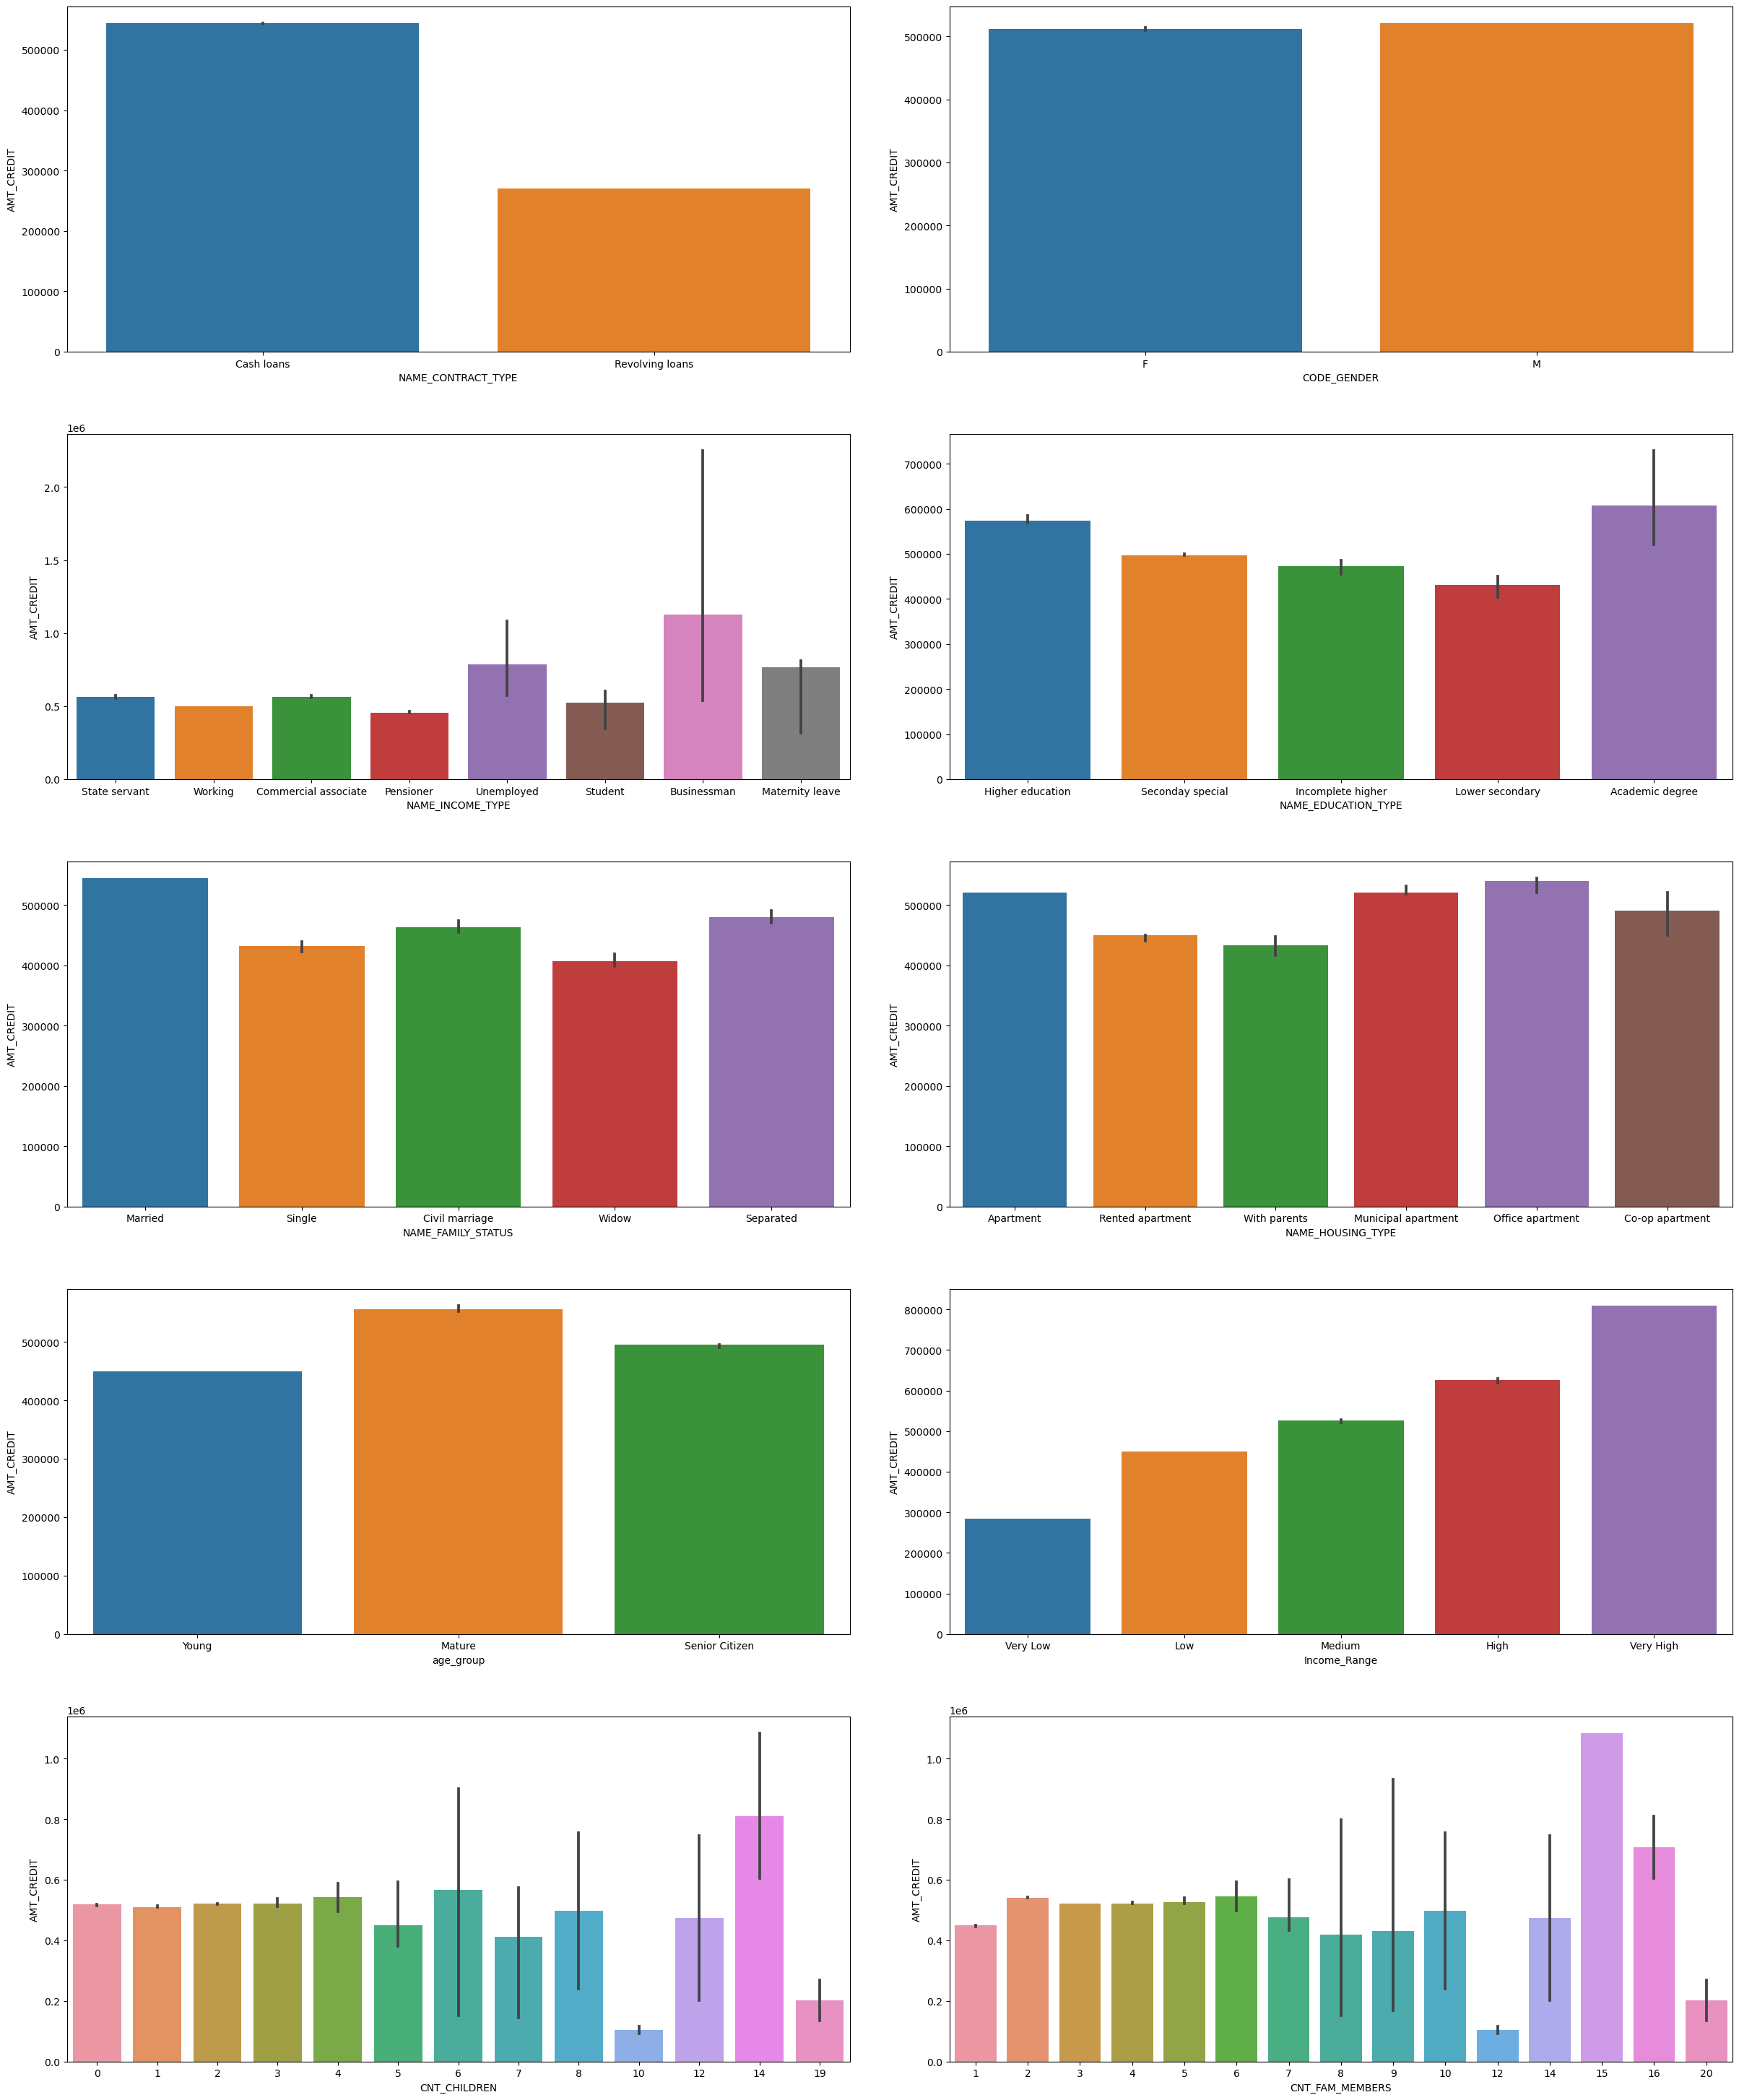

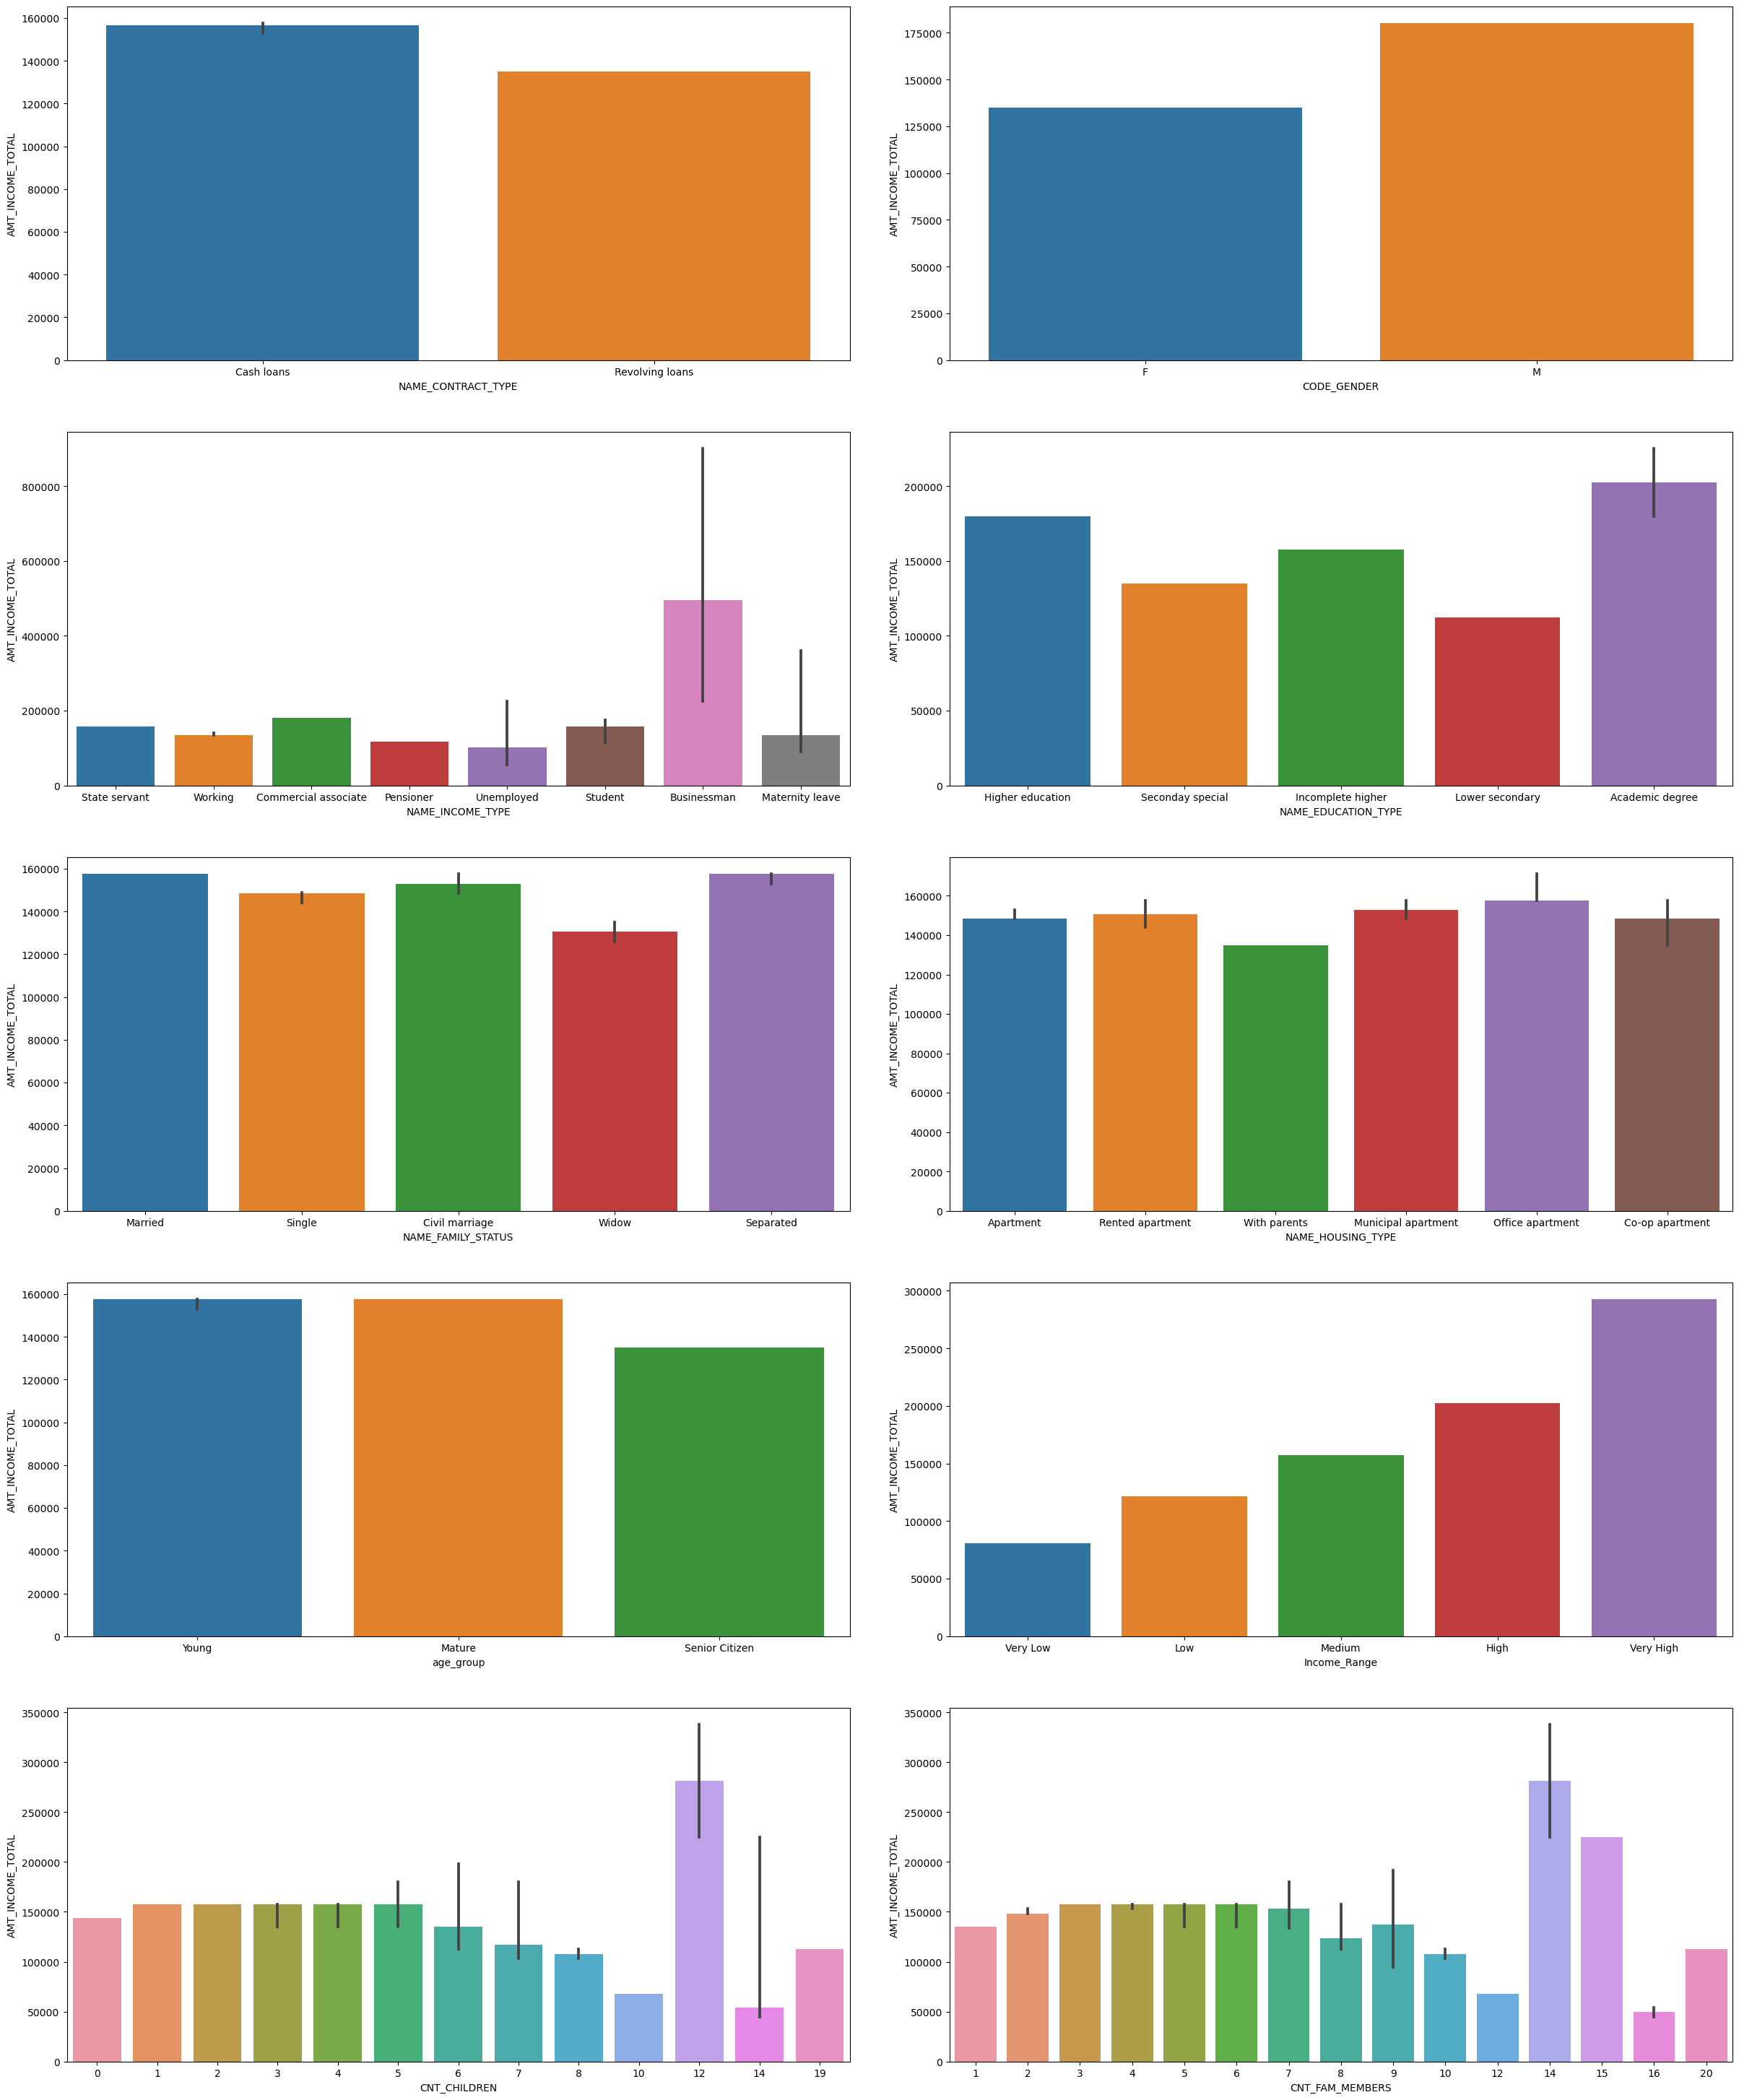

In [158]:
# Taking median values for AMT_CREDIT and AMT_INCOME_TOTAL as there are some outliers in them.
def bivariate_1(y):
    fig, axes = plt.subplots(5, 2,figsize=(25,30))
    for item,ax in zip(lst_cat,axes.flatten()):
        sns.barplot(data=application_data[application_data.TARGET==0],x=item,y=y,estimator=(lambda x:np.percentile(x,50)),ax=ax)
    fig.tight_layout(pad=4.0)
    plt.show()
for i in ["AMT_CREDIT","AMT_INCOME_TOTAL"]:
    
    bivariate_1(i)

## Insights Summary:

### AMT_CREDIT vs Rest

<b>1. For non defaulters the people are taking more cash loans and the amount of those loans are high as can be seen from the plot AMT_CREDIT type vs NAME_CONTRACT_TYPE.</b>


<b>2. Male are taking more amount as high as 6 lacs or more than Female.</b>


<b>3. Buisness man are taking loans of higher amount which is evident because they are taking loans for buisness setup.</b>


<b>4. People with Academic degree and Higher education are taking higher loan amounts , which means higher education/ Academic degree requires lot of money.</b>


<b>5. Married people and those who are middle aged as evident from previous are the highest loan takers and the amount of loan they take is the highest.</b>


<b>6. Those having more children and more family members are taking loan of huge amount.</b>

### AMT_INCOME_TOTAL vs Rest

<b>1. People are taking more cash loans with high income.</b>


<b>2. Male are having higher income when compared to female's income.</b>


<b>3. Bussiness men are having maximum income which is also evident from the fact that they run independent buisness.</b>


<b>4. Those with academic degree are having more income.</b>


<b>5. People who are married and seperated have highest incomes.</b>


<b>6. While people having more children and more family incomes have higher family incomes but they are very few in nos.Mostly people with 2 family members and less or no children are having highest count as fro previous analysis.</b>


<b>6. Thus for non defaulters Married couples with 0 or nochildren who are in their middle age and have low to high income range are taking loans and also repaying them. And also there are some cases where we have found outliers but they cannot be disregarded as they are though few in nos can be a potential candidate.</b>

* FOR NON DEFAULTERS

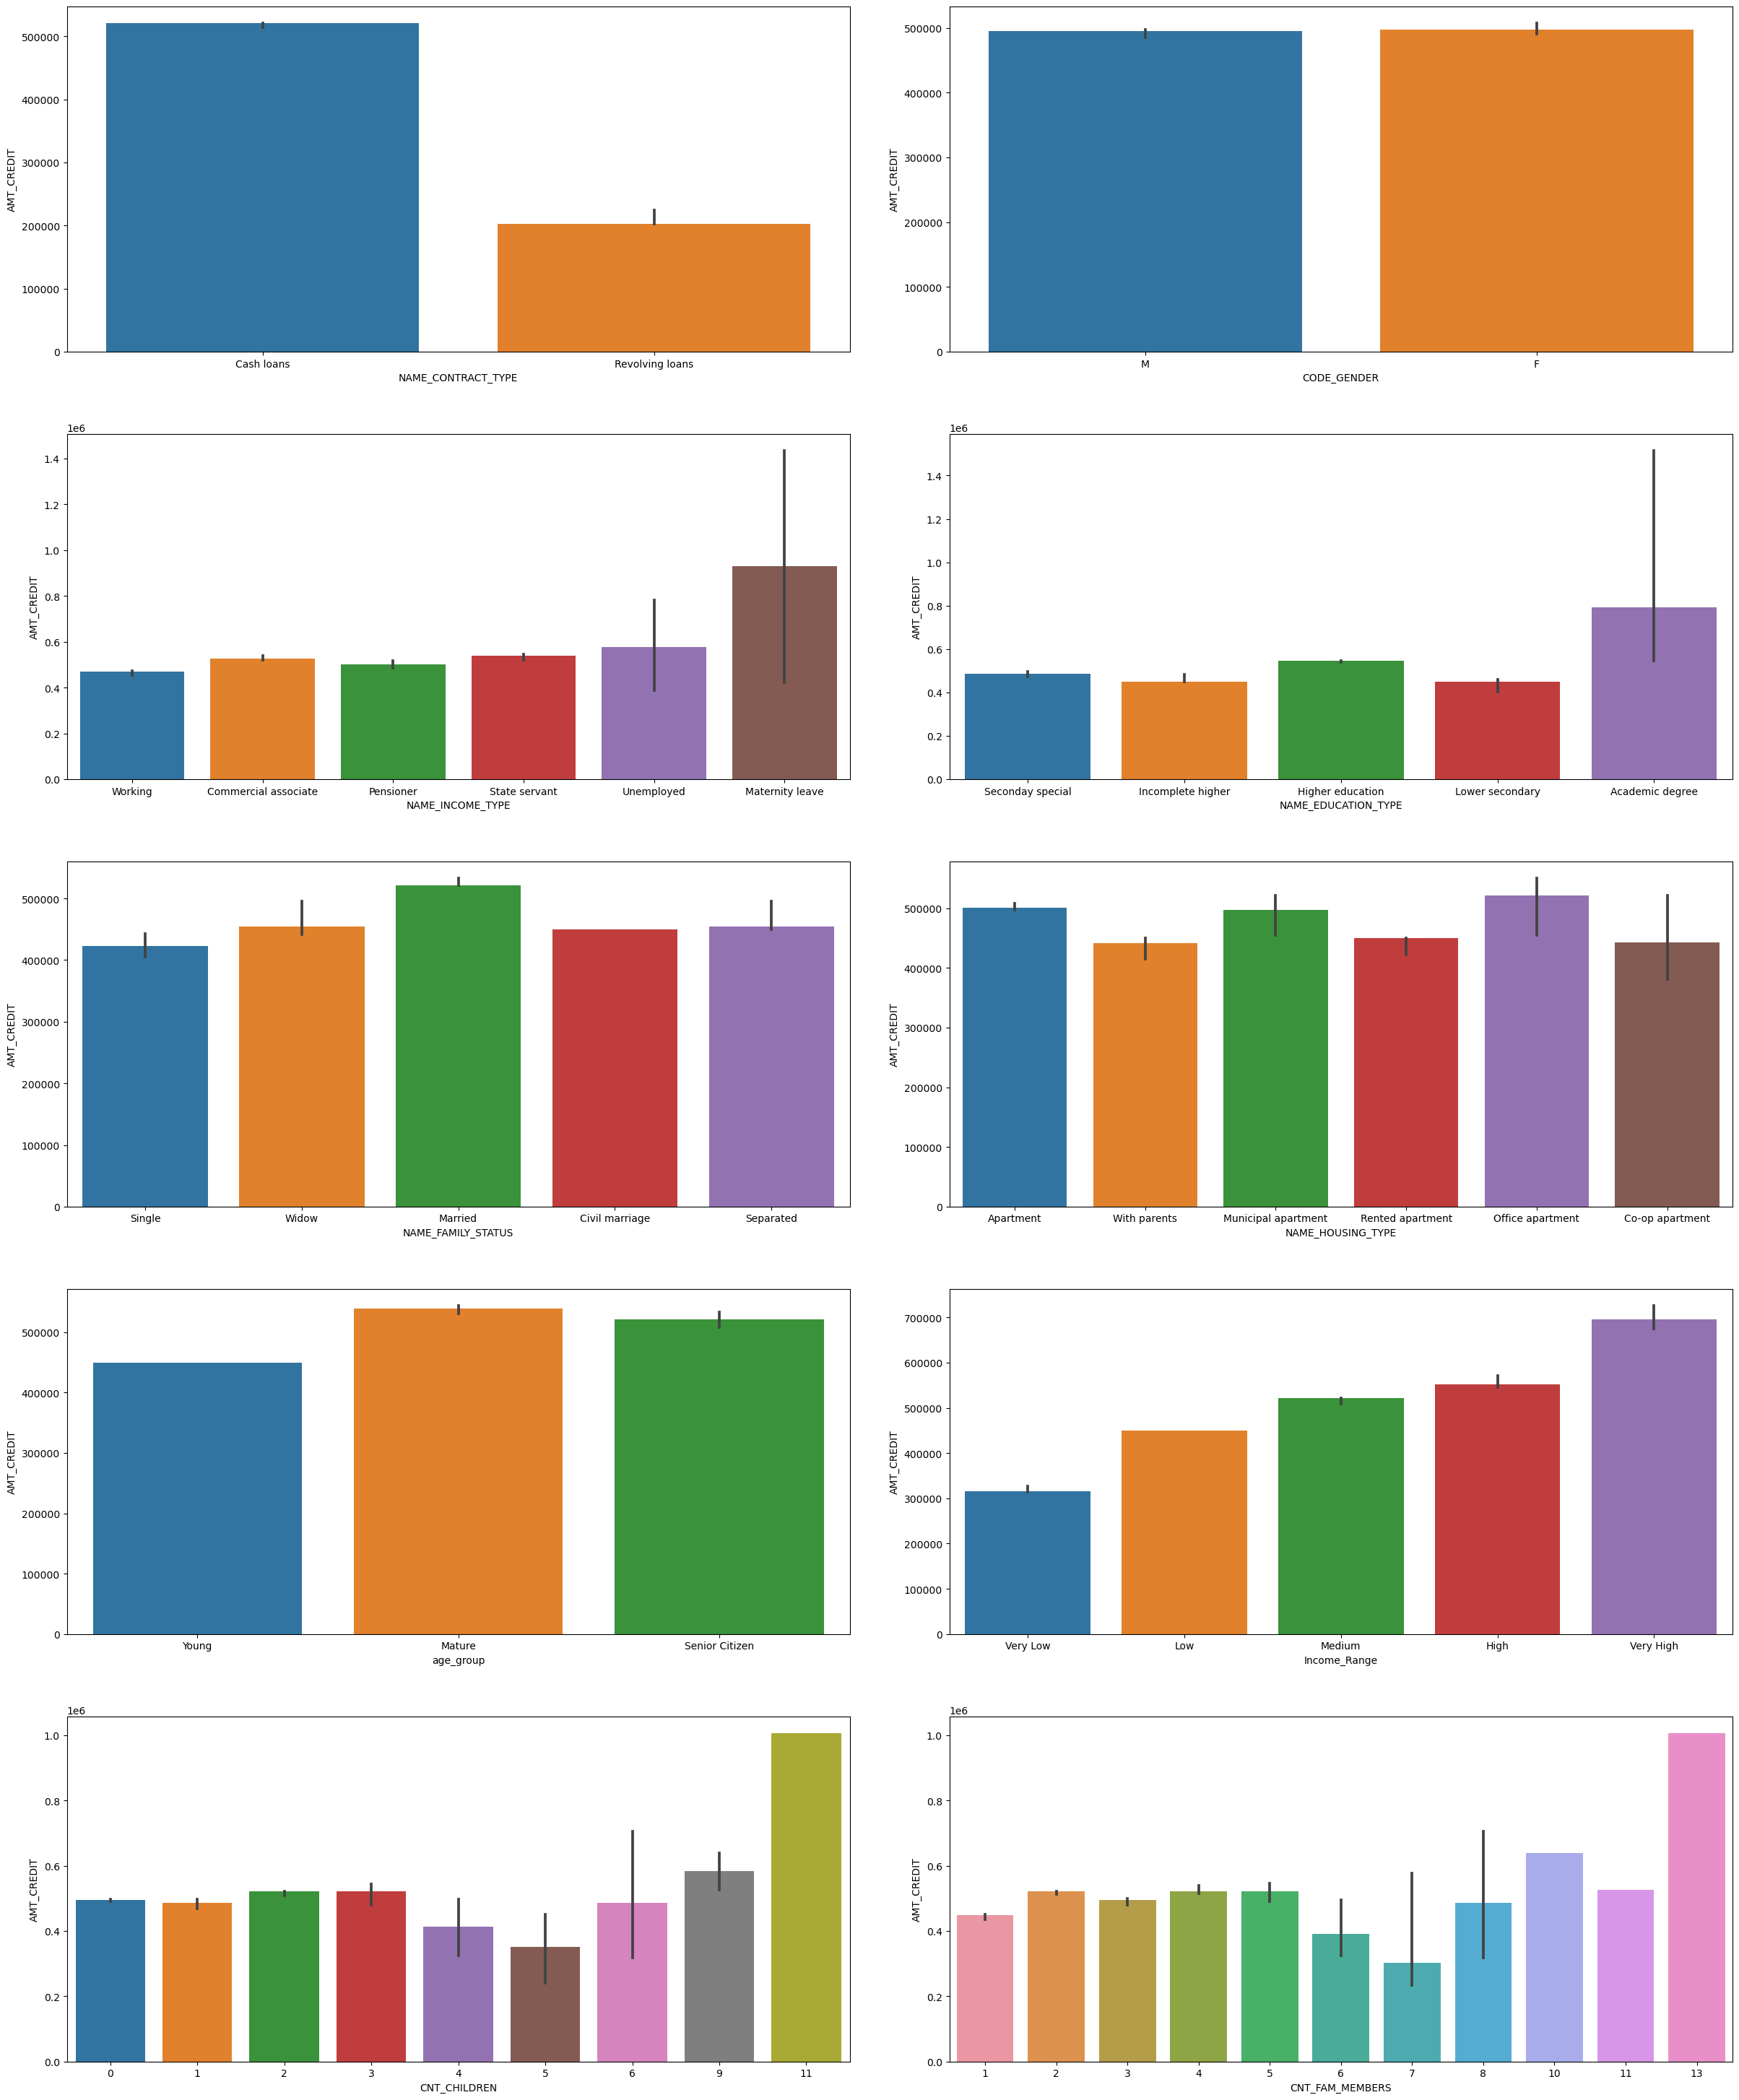

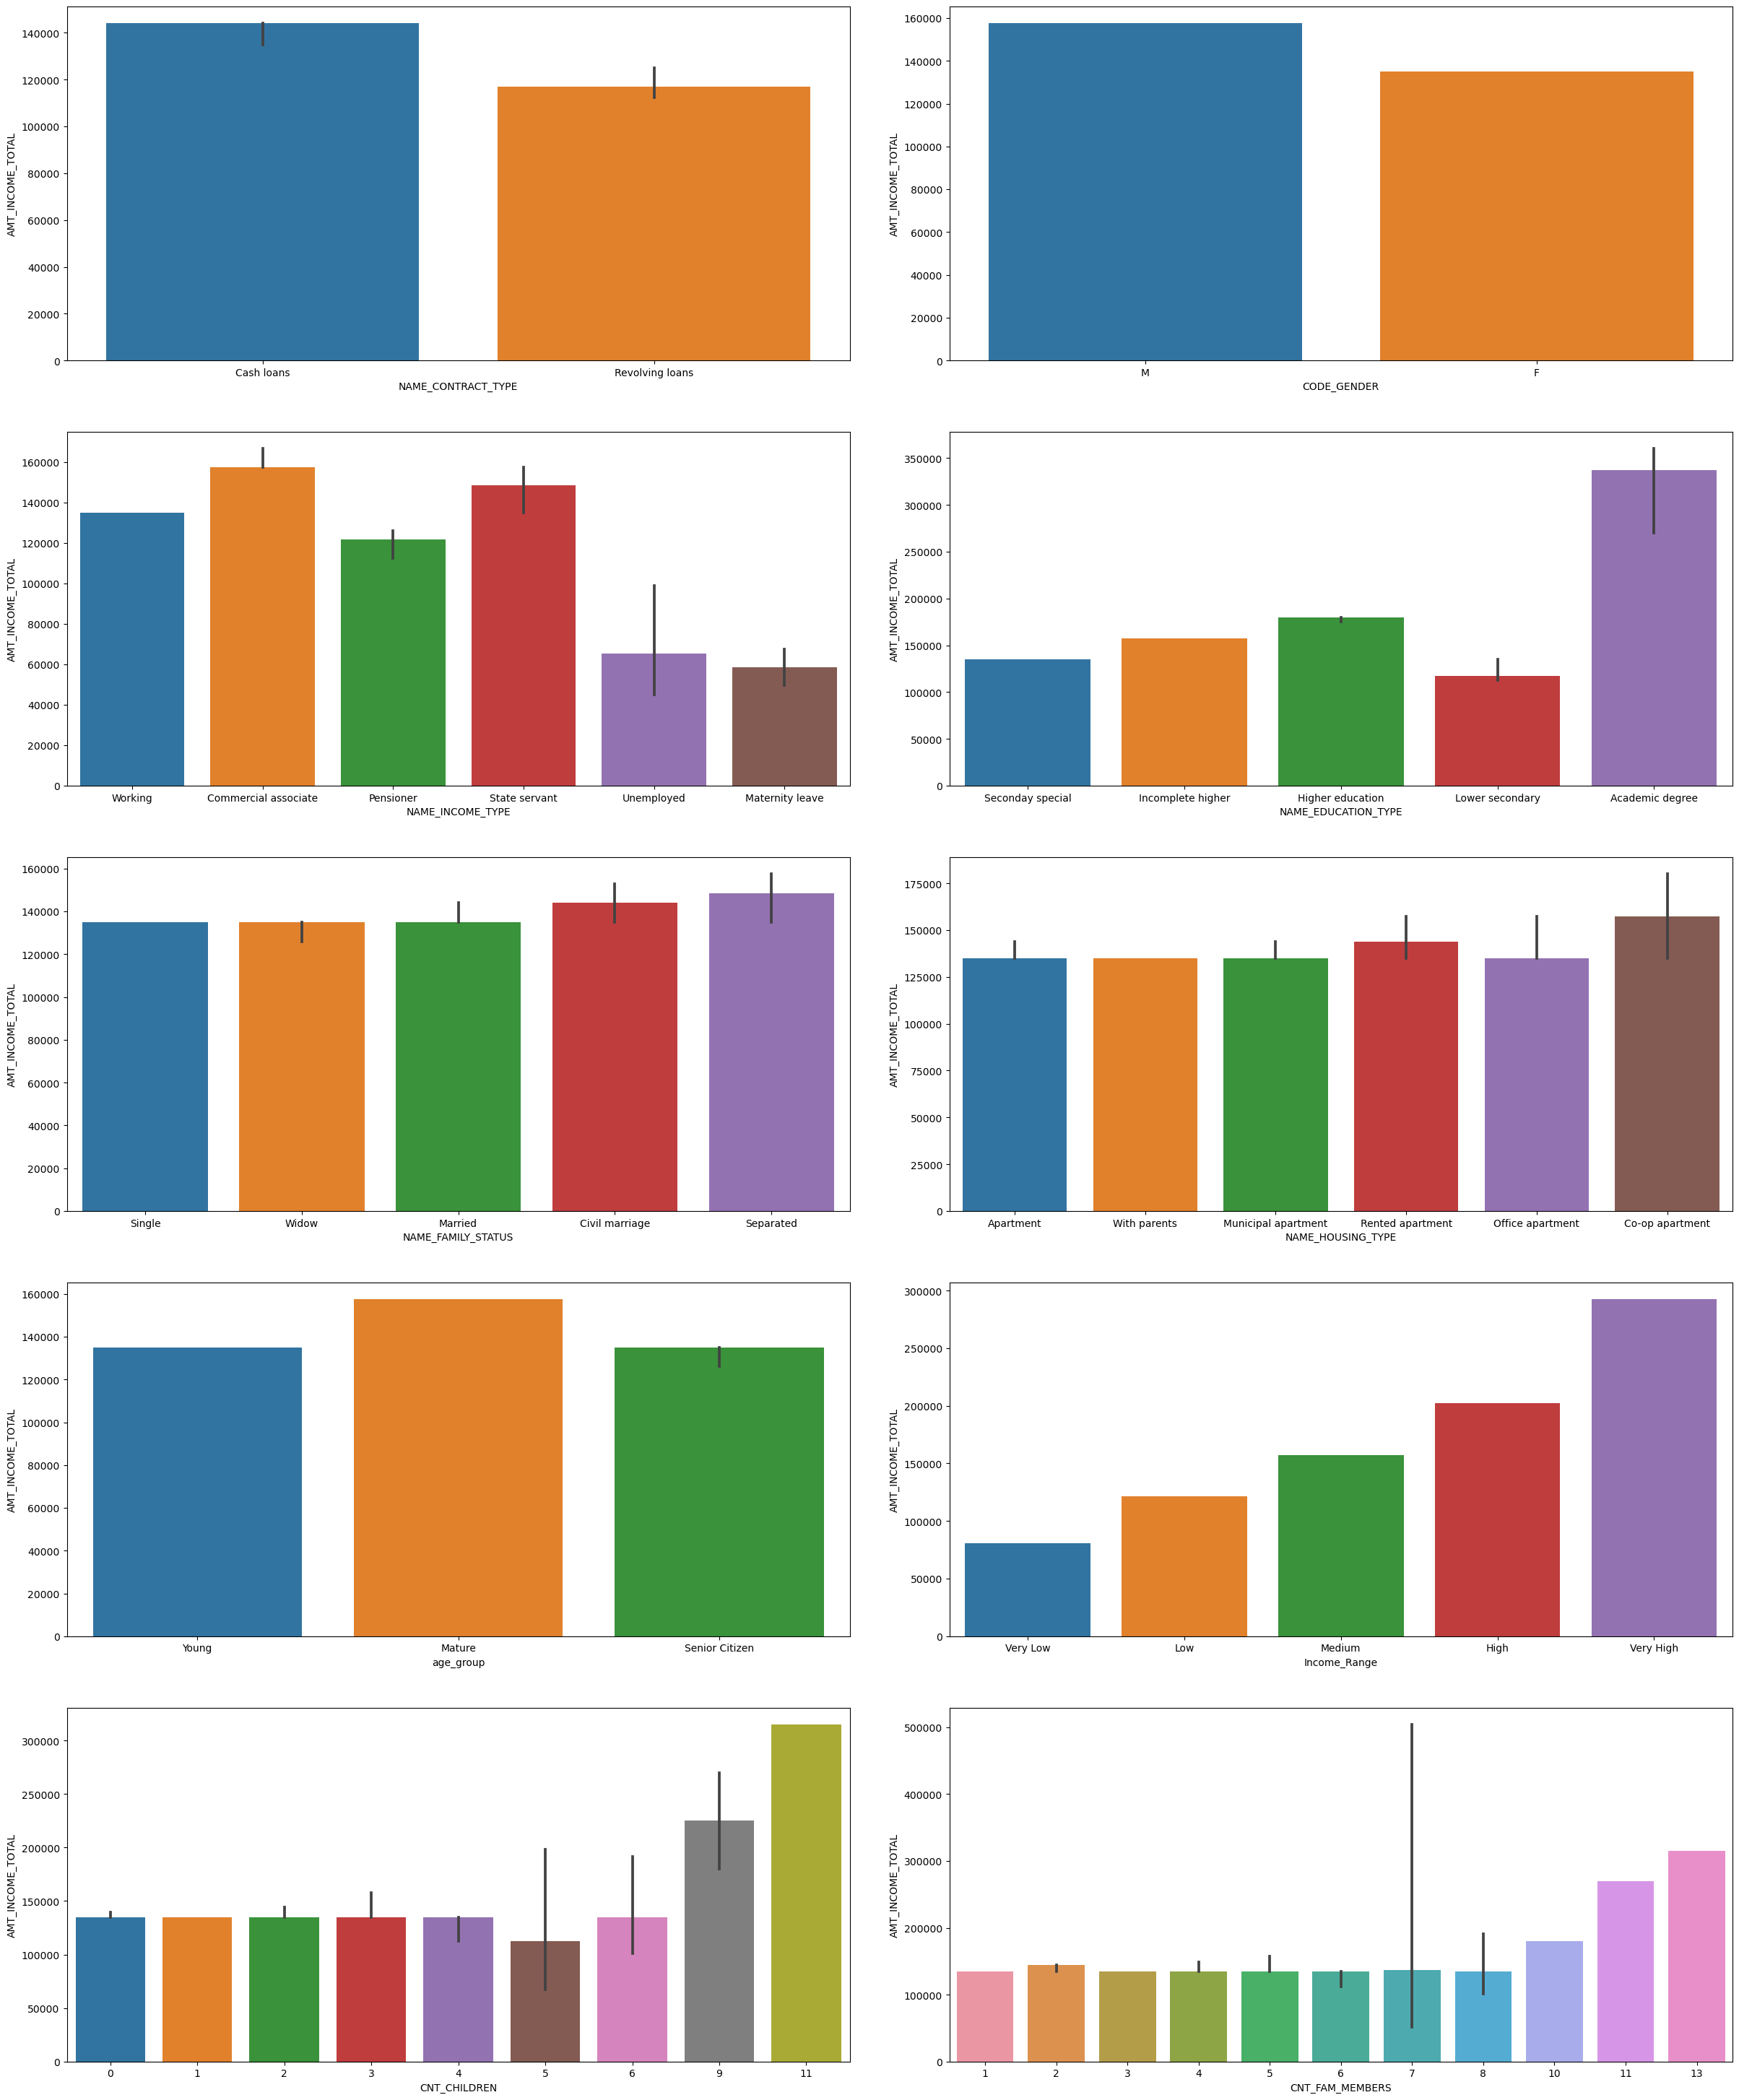

In [159]:
def bivariate_2(y):
    fig, axes = plt.subplots(5, 2,figsize=(25,30))
    for item,ax in zip(lst_cat,axes.flatten()):
        sns.barplot(data=application_data[application_data.TARGET==1],x=item,y=y,estimator=(lambda x:np.percentile(x,50)),ax=ax)
    fig.tight_layout(pad=4.0)
    plt.show()
for i in ["AMT_CREDIT","AMT_INCOME_TOTAL"]:
    
    bivariate_2(i)

## Insights Summary:

### AMT_CREDIT vs Rest

<b>Everything is very similar except that those with Maternity_leave have high tendency of taking big amount loans and not returning them on time.</b>


### AMT_INCOME_TOTAL vs Rest

<b>Almost everything is similar in this case also only notable thing is People from various income types are turning out to be defaulters.</b>

## Multi Variate Analysis

### HEAT MAP

In [160]:
pivot1= pd.pivot_table(data = application_data, values="TARGET", index=["CODE_GENDER","age_group"],
                      columns=["NAME_EDUCATION_TYPE"], aggfunc=np.mean)

pivot1

NAME_EDUCATION_TYPE         Academic degree  Higher education  \
CODE_GENDER age_group                                           
F           Young                  0.115385          0.059127   
            Mature                 0.000000          0.044641   
            Senior Citizen         0.000000          0.034412   
M           Young                  0.000000          0.070188   
            Mature                 0.000000          0.061767   
            Senior Citizen         0.000000          0.051188   

NAME_EDUCATION_TYPE         Incomplete higher  Lower secondary  \
CODE_GENDER age_group                                            
F           Young                    0.092009         0.198370   
            Mature                   0.063608         0.101717   
            Senior Citizen           0.042607         0.053963   
M           Young                    0.097561         0.149590   
            Mature                   0.083832         0.139571   
            Senior Citizen           0.062893         0.106849   

NAME_EDUCATION_TYPE         Seconday special  
CODE_GENDER age_group                         
F           Young                   0.124135  
            Mature                  0.072160  
            Senior Citizen          0.048173  
M           Young                   0.141163  
            Mature                  0.105746  
            Senior Citizen          0.076638

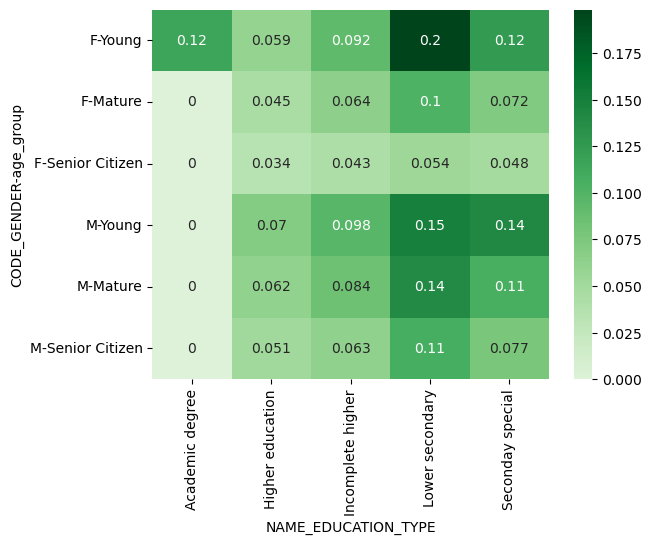

In [161]:
sns.heatmap(pivot1,cmap="Greens",annot=True,center=0.08072881945686496)
plt.show()

## Insights: 

<b>1. Academic Degree candidates are the least among non defaulters.</b>


<b>2. Female Young candidates with lower secondary education are most likely to dafulter.</b>


<b>3. While Male candidates of Lower secondary and secondary special education has higher defaulters.</b>

In [162]:
pivot2= pd.pivot_table(data = application_data, values="TARGET", index=["CODE_GENDER","age_group"],
                      columns=["Income_Range"], aggfunc=np.mean)

pivot2

Income_Range                Very Low       Low    Medium      High  Very High
CODE_GENDER age_group                                                        
F           Young           0.114525  0.104017  0.102361  0.084363   0.075410
            Mature          0.070137  0.066736  0.069538  0.065829   0.053566
            Senior Citizen  0.045798  0.047162  0.050773  0.043973   0.041704
M           Young           0.149389  0.137856  0.132786  0.115805   0.079710
            Mature          0.118638  0.107742  0.104954  0.093514   0.075049
            Senior Citizen  0.074495  0.080860  0.058665  0.076214   0.053926

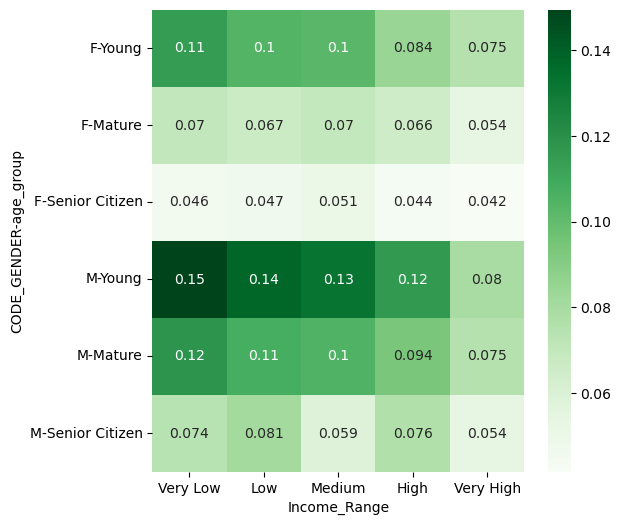

In [163]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot2,cmap="Greens",annot=True)
plt.show()

## Insights: 

<b>1. Middle aged and Young males having income in the range of very low to high have the most chances to default.</b>


<b>2. Young Females are most among defaulters.</b>


<b>3. Thus Male candidates are not great in case of returning money in time and thus have higher tendency of becoming defaulter.</b>

In [164]:
pivot3= pd.pivot_table(data = application_data, values="TARGET", index=["CODE_GENDER","age_group"],
                      columns=["NAME_CONTRACT_TYPE"], aggfunc=np.mean)

pivot3

NAME_CONTRACT_TYPE          Cash loans  Revolving loans
CODE_GENDER age_group                                  
F           Young             0.103566         0.073969
            Mature            0.067886         0.044000
            Senior Citizen    0.047134         0.029632
M           Young             0.125050         0.071429
            Mature            0.100563         0.049072
            Senior Citizen    0.073501         0.050573

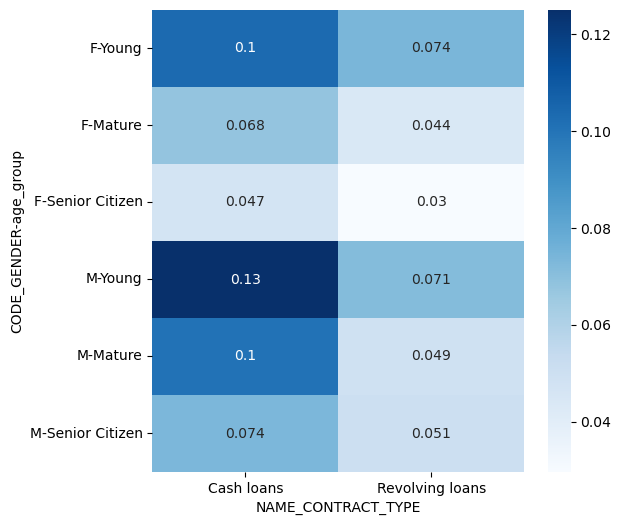

In [165]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot3,cmap="Blues",annot=True)
plt.show()

## Insights: 

<b>Those taking cash loans has a higher tendency to default and males are as usual on the top followed by Female.</b>

In [166]:
pivot4= pd.pivot_table(data = application_data, values="TARGET", index=["CODE_GENDER","age_group"],
                      columns=["OCCUPATION_TYPE"], aggfunc=np.mean)

pivot4

OCCUPATION_TYPE             Accountants  Cleaning staff  Cooking staff  \
CODE_GENDER age_group                                                    
F           Young              0.060948        0.173693       0.157182   
            Mature             0.040967        0.088790       0.085470   
            Senior Citizen     0.034884        0.059850       0.046099   
M           Young              0.082192        0.131868       0.127072   
            Mature             0.039683        0.112360       0.102151   
            Senior Citizen     0.000000        0.071429       0.076923   

OCCUPATION_TYPE             Core staff   Drivers  HR staff  \
CODE_GENDER age_group                                        
F           Young             0.074419  0.113402  0.079646   
            Mature            0.051205  0.073379  0.054475   
            Senior Citizen    0.026446  0.041667  0.024390   
M           Young             0.084610  0.133180  0.136364   
            Mature            0.067364  0.108118  0.000000   
            Senior Citizen    0.045113  0.089552  0.000000   

OCCUPATION_TYPE             High skill tech staff  IT staff  Laborers  \
CODE_GENDER age_group                                                   
F           Young                        0.078638  0.095890  0.122420   
            Mature                       0.056666  0.043478  0.078137   
            Senior Citizen               0.042514  0.000000  0.036697   
M           Young                        0.064846  0.070588  0.136943   
            Mature                       0.057436  0.055556  0.107287   
            Senior Citizen               0.031056  0.000000  0.078828   

OCCUPATION_TYPE             Low-skill Laborers  Managers  Medicine staff  \
CODE_GENDER age_group                                                      
F           Young                     0.159091  0.085163        0.097674   
            Mature                    0.151111  0.045689        0.056519   
            Senior Citizen            0.125000  0.034565        0.044586   
M           Young                     0.198492  0.079438        0.076923   
            Mature                    0.159142  0.067066        0.125984   
            Senior Citizen            0.122222  0.060563        0.000000   

OCCUPATION_TYPE             Pensioner  Private service staff  Realty agents  \
CODE_GENDER age_group                                                         
F           Young            0.092784               0.089374       0.093851   
            Mature           0.057219               0.052055       0.050847   
            Senior Citizen   0.047900               0.014286       0.038462   
M           Young            0.187970               0.072727       0.307692   
            Mature           0.084165               0.076923       0.088235   
            Senior Citizen   0.067859               0.000000       0.000000   

OCCUPATION_TYPE             Sales staff  Secretaries  Security staff  \
CODE_GENDER age_group                                                  
F           Young              0.124114     0.072391        0.187739   
            Mature             0.080197     0.071304        0.095103   
            Senior Citizen     0.049661     0.000000        0.038043   
M           Young              0.096798     0.181818        0.147009   
            Mature             0.087735     0.121212        0.100470   
            Senior Citizen     0.122807     0.000000        0.100536   

OCCUPATION_TYPE             Waiters/barmen staff   missing  
CODE_GENDER age_group                                       
F           Young                       0.141925  0.086813  
            Mature                      0.093204  0.064814  
            Senior Citizen              0.018519  0.037140  
M           Young                       0.110294  0.119117  
            Mature                      0.033333  0.091412  
            Senior Citizen                   NaN  0.066502

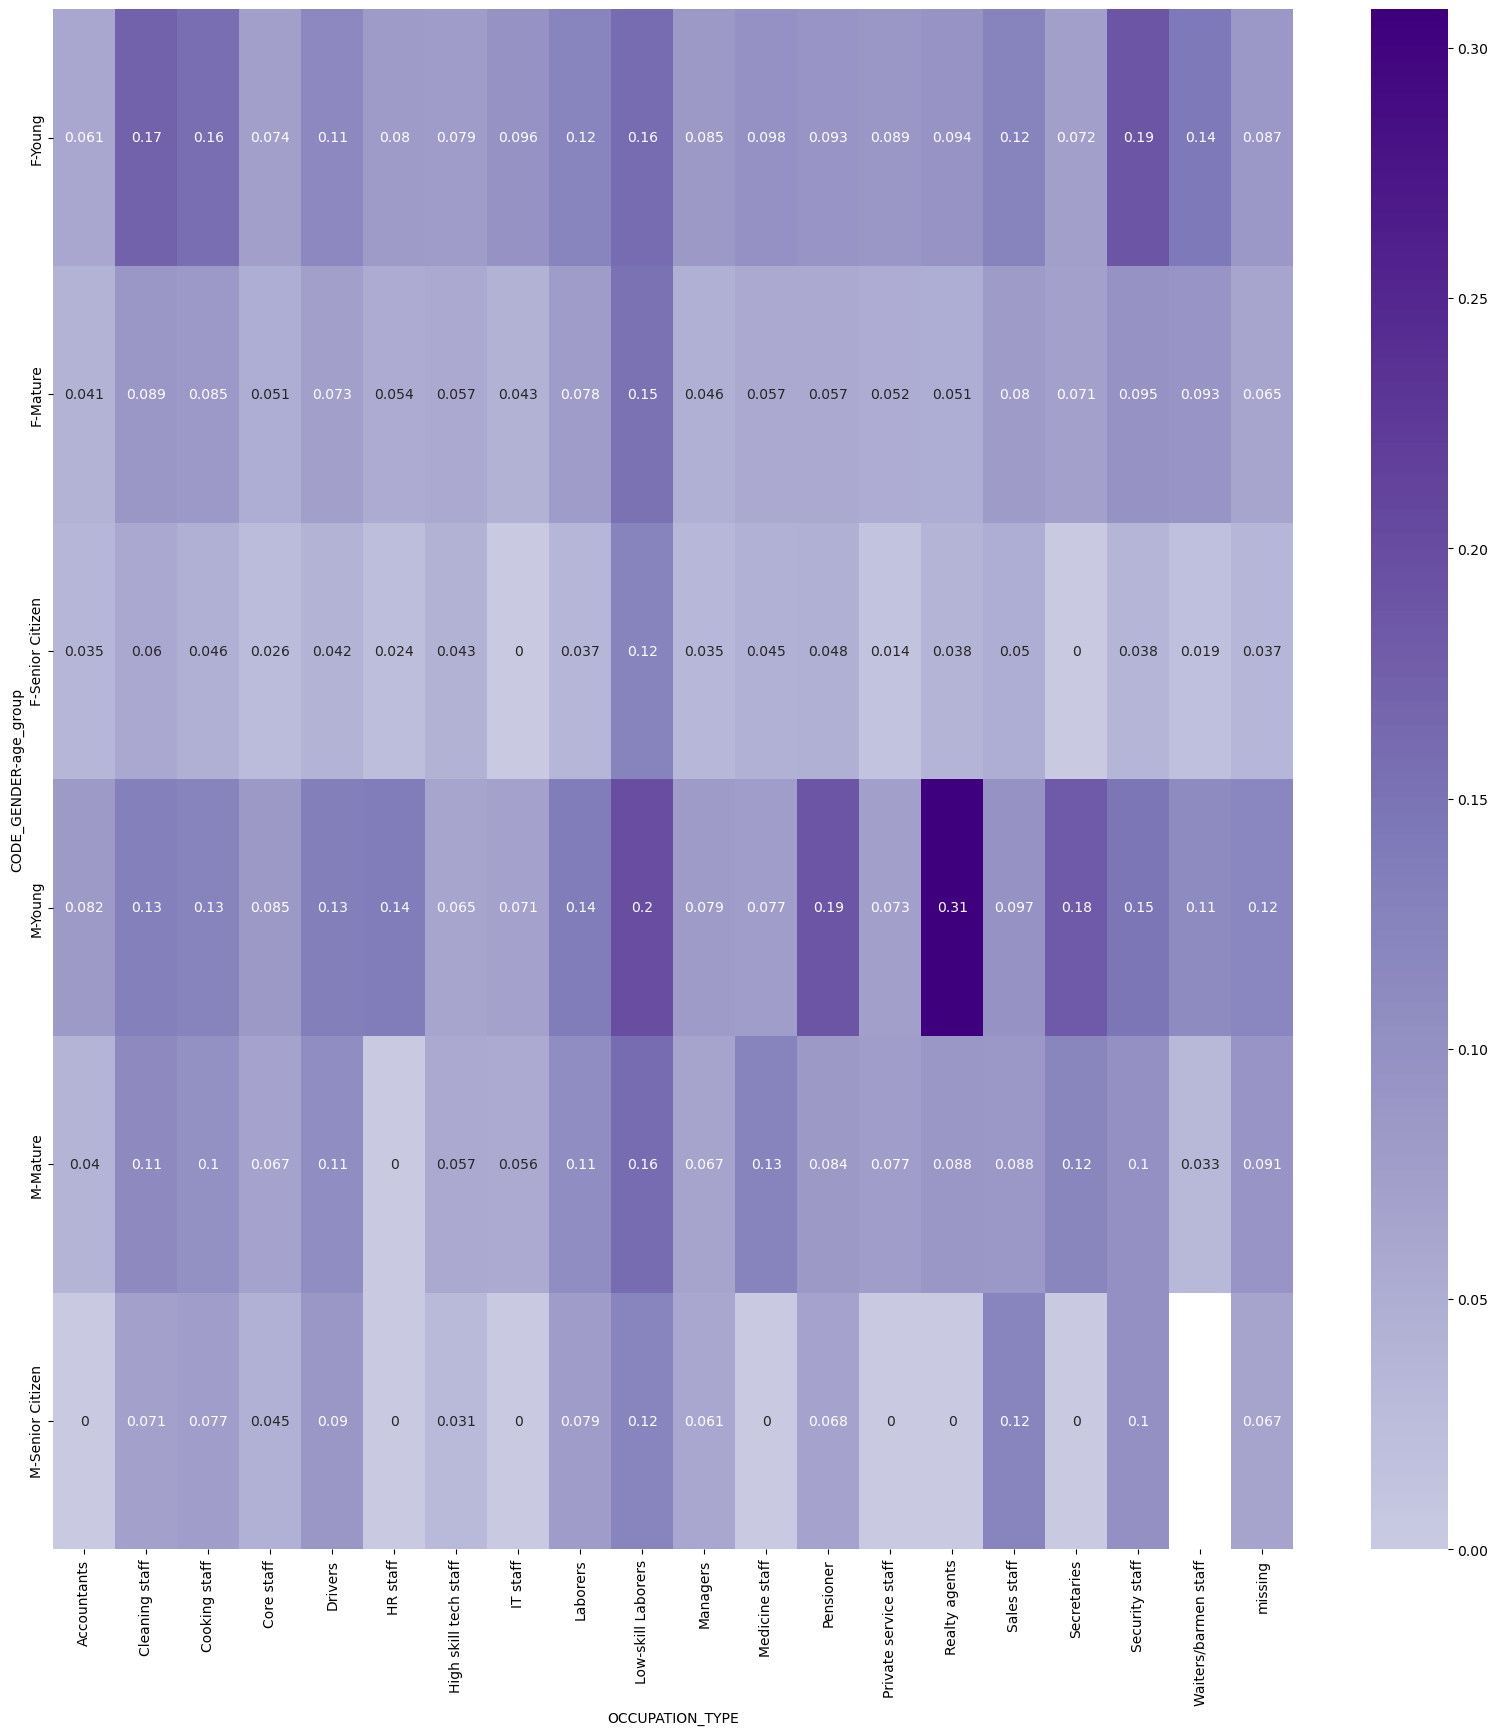

In [167]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot4,cmap="Purples",annot=True,center=0.081)
plt.show()

## Insights: 

<b>Realty Agents, Pensioners, Lower_Skilled Labourers have high tendency to become defaulters for middle aged and young male. Security Staff Young females also show higher tendency of becoming defaulters.</b>

## Reading Previous application dataset

In [168]:
#Check sample random rows from dataset.
previous_application.sample(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
99826,1970823,134118,Consumer loans,5707.395,78340.5,97830.0,7834.5,78340.5,SATURDAY,8,Y,1,0.080751,NaN,NaN,XAP,Refused,-794,Cash through the bank,LIMIT,NaN,Repeater,Audio/Video,POS,XNA,Country-wide,1500,Consumer electronics,24.0,middle,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN
767100,2632220,159874,Consumer loans,21715.290,214177.5,214177.5,0.0,214177.5,SUNDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-808,Cash through the bank,XAP,NaN,Repeater,Consumer Electronics,POS,XNA,Country-wide,2000,Consumer electronics,12.0,middle,POS household with interest,365243.0,-776.0,-446.0,-536.0,-528.0,0.0
989834,2492368,372577,Cash loans,13091.760,225000.0,343800.0,NaN,225000.0,TUESDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,-158,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-128.0,1282.0,365243.0,365243.0,1.0
1236555,2479836,258844,Cash loans,26038.350,135000.0,135000.0,NaN,135000.0,SATURDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-1078,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,0,XNA,6.0,middle,Cash X-Sell: middle,365243.0,-1048.0,-898.0,-988.0,-986.0,0.0
953430,2174430,290683,Cash loans,25245.000,450000.0,524844.0,NaN,450000.0,FRIDAY,13,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-1530,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,36.0,middle,Cash Street: middle,365243.0,-1498.0,-448.0,-1288.0,-1286.0,0.0
364199,2687670,274020,Consumer loans,4648.095,48879.0,49212.0,4891.5,48879.0,SUNDAY,15,Y,1,0.098465,NaN,NaN,XAP,Approved,-364,Cash through the bank,XAP,Unaccompanied,New,Audio/Video,POS,XNA,Regional / Local,250,Consumer electronics,12.0,low_normal,POS household with interest,365243.0,-332.0,-2.0,-242.0,-238.0,0.0
380059,2426275,106070,Consumer loans,3653.235,26190.0,28494.0,0.0,26190.0,WEDNESDAY,11,Y,1,0.000000,NaN,NaN,XAP,Approved,-901,Cash through the bank,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Stone,556,Construction,10.0,high,POS industry with interest,365243.0,-852.0,-582.0,-582.0,-575.0,0.0
1142037,2382574,253273,Consumer loans,17490.870,148261.5,158863.5,0.0,148261.5,THURSDAY,6,Y,1,0.000000,NaN,NaN,XAP,Approved,-1114,Cash through the bank,XAP,Family,New,Furniture,POS,XNA,Country-wide,333,Furniture,10.0,low_normal,POS industry with interest,365243.0,-1083.0,-813.0,-813.0,-810.0,0.0
1272471,2596771,199431,Cash loans,30137.085,900000.0,1030680.0,NaN,900000.0,MONDAY,18,Y,1,NaN,NaN,NaN,Building a house or an annex,Refused,-771,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
215185,2050193,270644,Consumer loans,5966.100,48564.0,48564.0,0.0,48564.0,TUESDAY,16,Y,1,0.000000,NaN,NaN,XAP,Approved,-261,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,39,Connectivity,10.0,middle,POS mobile with interest,365243.0,-218.0,52.0,365243.0,365243.0,0.0


In [169]:
previous_application.shape

(1670214, 37)

In [170]:
#Check the percentage number of null values in the columns
previous_application.isnull().sum()/len(previous_application.index)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Data Handling and Cleaning

In [171]:
list_of_null=previous_application.columns[(previous_application.isnull().any())].tolist()
list_of_null

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

#### Removing columns with missing values more than 40%
* As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [172]:
# Dropping columns which have null values greater than 40%
per_null = previous_application.isnull().sum() / len(previous_application)
missing_values = per_null[per_null > 0.40].index
previous_application.drop(missing_values, axis=1, inplace=True)

In [173]:
previous_application.shape

(1670214, 26)

In [174]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

#### Checking the rest columns with null values

* AMT_ANNUITY

In [175]:
previous_application.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

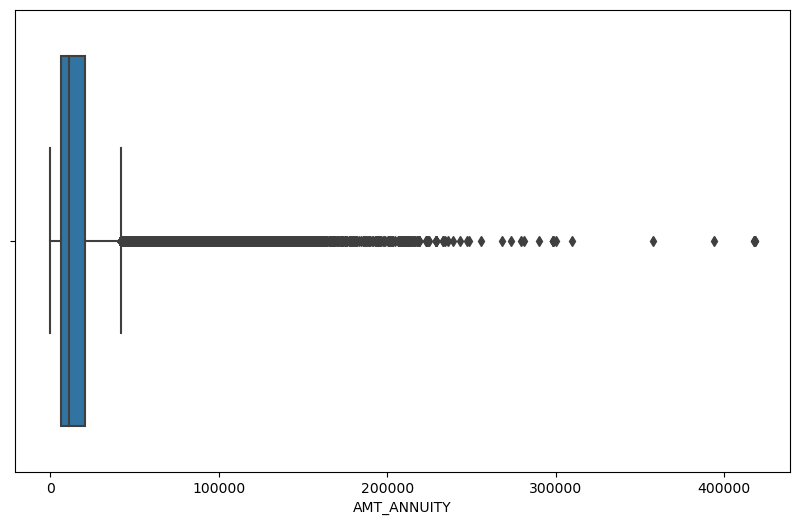

In [176]:
plt.figure(figsize=(10,6))
sns.boxplot(previous_application.AMT_ANNUITY)
plt.show()

* checking NAME_CASH_LOAN_PURPOSE variable

In [177]:
previous_application.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

<b>Note: NAME_CASH_LOAN_PURPOSE has too many XNA and XAP values which are randomly missing and thus removing them all as they are present in majority.</b>

In [ ]:
previous_application.drop(previous_application[(previous_application.NAME_CASH_LOAN_PURPOSE=="XNA") | (previous_application.NAME_CASH_LOAN_PURPOSE=="XAP")].index,inplace=True)

In [ ]:
previous_application.shape

In [ ]:
previous_application.isnull().sum()

In [ ]:
previous_application.DAYS_DECISION.value_counts()

<b>Note: All are negative values thus changing them.</b>

In [ ]:
previous_application.DAYS_DECISION=previous_application.DAYS_DECISION.apply(lambda x:abs(x))
previous_application.DAYS_DECISION.value_counts()

In [ ]:
previous_application.NAME_GOODS_CATEGORY.value_counts(normalize=True)

<b>Note: there is XNA values only thus dropping it.</b>

In [ ]:
previous_application.drop("NAME_GOODS_CATEGORY",axis=1,inplace=True)

In [ ]:
previous_application.CODE_REJECT_REASON.value_counts()

In [ ]:
previous_application.NAME_SELLER_INDUSTRY.value_counts()

#### Dropping some columns because we dont see any importance w.r.t. to target variable

In [ ]:
previous_application.drop(['CODE_REJECT_REASON','SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY'], axis = 1, inplace = True)

In [ ]:
previous_application.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT"],axis=1,inplace=True)

In [ ]:
previous_application.shape

In [ ]:
previous_application.info()

#### Changing some common column names before joining

In [ ]:
previous_application.rename(columns = {'NAME_CONTRACT_TYPE':'NAME_CONTRACT_TYPE_PREV'}, inplace = True)
previous_application.rename(columns = {'AMT_ANNUITY':'AMT_ANNUITY_PREV'}, inplace = True)
previous_application.rename(columns = {'AMT_CREDIT':'AMT_CREDIT_PREV'}, inplace = True)
previous_application.rename(columns = {'AMT_GOODS_PRICE':'AMT_GOODS_PRICE_PREV'}, inplace = True)

In [ ]:
previous_application.info()

## Merging two datasets application_data with previous_application into a new dataset total_application

In [ ]:
total_application = pd.merge(left=application_data, right=previous_application, how='inner', on='SK_ID_CURR')
total_application.info()

In [ ]:
# Imputing AMT_ANNUITY_PREV null values with median
total_application.AMT_ANNUITY_PREV.fillna(total_application.AMT_ANNUITY_PREV.median)

In [ ]:
total_application.NAME_CLIENT_TYPE.replace("XNA","Repeater",inplace=True)

## Univariate Analysis

In [ ]:
lst_to_analyse = ["AMT_ANNUITY_PREV","AMT_APPLICATION","AMT_CREDIT_PREV","AMT_GOODS_PRICE_PREV"]

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(10,15))

for item,ax in zip(lst_to_analyse, axes.flatten()):
    
    sns.boxplot(data=total_application[item],ax=ax)
    ax.set_xlabel(item)

plt.show()

## Insights

<b>We cane see that AMT_APPLICATION, AMT_CREDIT_PREV and AMT_GOODS_PRICE_PREV have a same trend which means mostly clients applied for the loan only for those goods/services they would buy and thus these three share a same pattern and have strong correlation.</b>

In [ ]:
sns.set_theme(style="darkgrid", palette="bright")
(total_application['NAME_CONTRACT_STATUS'].value_counts(normalize = True) * 100.0).plot.bar()
plt.title("Status of the loans of the applicants")
plt.show()

## Insights

<b>Around 58% loans were refused.</b>

<b>Around 39% loans were approved.</b>

<b>Around 2% loans were cancelled.</b>

<b>Rest very few were unused offer.</b>

## Bivariate And Multivariate Analysis

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=total_application,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.show()

## Insights

<b>Most of the previous clients who already taken loans applied again for loans and most also most of them are refused due to defaulters.</b>

## Heat Maps(Multivariate Analysis)

In [ ]:
pivot5= pd.pivot_table(data = total_application, values='TARGET', index=['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE'],
                      columns=['NAME_INCOME_TYPE'], aggfunc=np.mean)
pivot5

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot5,cmap="YlOrBr",annot=True)
plt.show()

## Insights

<b>Unemployed people have some of the highest tendencies to become defaulter in some cases they are old clients and are approved while in other cases they are Refused.</b>

In [ ]:
pivot6= pd.pivot_table(data = total_application, values='TARGET', index=['NAME_CONTRACT_STATUS','CODE_GENDER'],
                      columns=['NAME_CONTRACT_TYPE'], aggfunc=np.mean)
pivot6

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot6,cmap="Greens",annot=True,center=0.081)
plt.show()

## Insights: 

<b>Those taking cash loans has a higher tendency to default and males are as usual on the top followed by Female.</b>

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data =total_application, y='AMT_CREDIT',hue='TARGET',x='NAME_CONTRACT_STATUS')
plt.title("Plot for columns AMT_CREDIT &  NAME_HOUSING_TYPE")
plt.show()

## Insights

<b>Some of those loans which were cancelled or unused offer has the highest loan amount.</b>

# FINAL CONCLUSION

### 1. We observe that working people have tendency to default and hence have payment difficuties coping up with the loans and EMIs. Unemployed people are also finding it difficult to pay on time and thus have very high tendency to default.

### 2. Pensioners and State Servants are very good applicants and should be given loans as they have the least chance to default.

### 3. We can see that most of the people who live in rented apartments have the greatest chance to become defaulters and those with their own apartments and those whose office is providing them with apartments are better off people with less chance to default.

### 4. Mostly people take cash loans and the no of defaulters who take cash loans is also more.

### 5. Academic Degree candidates are the least among non defaulters. Female Young candidates with lower secondary education are most likely to dafult. While male candidates of Lower secondary and secondary special education has higher defaulters.

### 6. Home loans and buisness developement loans should always be given as they have the least chance to become defaulters. Loans taken for causes like hobbies and other are likely to default. So the bank should considerably approve loans for those who are asking for Home loans/ car loans.

### 7. The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ and realty agents are having most number of defaulters. While Accountants are one of the best applicants and their loan should always be approved.

### 8. Mostly middle aged and young people take loans which is normal from the fact that they have lots of responsibilities and are hence taking loans for either pursuing education or for family reasons.

### 9. Female applicants are way better than males and in most cases repay the loan on time.